# 0.0 Imports

In [1]:
import pandas       as pd
import numpy        as np
import seaborn      as sns
import sweetviz     as sv

from matplotlib         import pyplot                   as plt
from sklearn            import model_selection          as ms
from ydata_profiling    import ProfileReport

from ipywidgets         import HTML, Button, widgets


In [2]:
df_train_all    =   pd.read_csv('./datasets/train.csv')
df_test         =   pd.read_csv('./datasets/test.csv')

In [3]:
df_train_y = df_train_all['Satisfaction'].apply(lambda x: 1 if x == 'Satisfied' else 0)
df_train = df_train_all.drop(columns=['Satisfaction'])

In [4]:
def jupyter_settings():
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

jupyter_settings()

HTML(value='<style>.container { width:100% !important; }</style>')

# 1.0 Data Description

In [5]:
df1 = df_train_all.copy()

## 1.1 Data Dimension

In [6]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 103904
Number of columns: 24


## 1.2 Analyze data

In [7]:
df1_original = df1.copy()  # Cria uma cópia do DataFrame original

# Realiza as operações de limpeza nos nomes das colunas
df1.columns = df1.columns.str.lower()
df1.columns = df1.columns.str.strip()
df1.columns = df1.columns.str.replace(' ', '_')
# df1         = df1.drop(columns={'id'})

In [8]:
df1.head()

id  gender      customer_type  age type_of_purchase store_size  store_distance  instore_wifi  open/close_time_convenient  easy_of_online_shopping  store_location  toilet_cleaning  dressing_room  waiting_room  kids_entertainment  seller_service  showroom  self-store  purchase_service  store_service  cleanliness  carrier_delay_in_minutes  delivery_delay_in_minutes                satisfaction
0   70172    Male     Loyal Customer   13         Personal      Small             460             3                           4                        3               1                5              3             5                   5               4         3           4                 4              5            5                        25                       18.0  Neutral or Dissatisfaction
1    5047    Male  disloyal Customer   25             Gift      Large             235             3                           2                        3               3                1              3             1                   1               1         5           3                 1              4            1                         1                        6.0  Neutral or Dissatisfaction
2  110028  Female     Loyal Customer   26             Gift      Large            1142             2                           2                        2               2                5              5             5                   5               4         3           4                 4              4            5                         0                        0.0                   Satisfied
3   24026  Female     Loyal Customer   25             Gift      Large             562             2                           5                        5               5                2              2             2                   2               2         5           3                 1              4            2                        11                        9.0  Neutral or Dissatisfaction
4  119299    Male     Loyal Customer   61             Gift      Large             214             3                           3                        3               3                4              5             5                   3               3         4           4                 3              3            3                         0                        0.0                   Satisfied

In [9]:
df1.describe().T

count          mean           std   min       25%      50%       75%       max
id                          103904.0  64924.210502  37463.812252   1.0  32533.75  64856.5  97368.25  129880.0
age                         103904.0     39.379706     15.114964   7.0     27.00     40.0     51.00      85.0
store_distance              103904.0   1189.448375    997.147281  31.0    414.00    843.0   1743.00    4983.0
instore_wifi                103904.0      2.729683      1.327829   0.0      2.00      3.0      4.00       5.0
open/close_time_convenient  103904.0      3.060296      1.525075   0.0      2.00      3.0      4.00       5.0
easy_of_online_shopping     103904.0      2.756901      1.398929   0.0      2.00      3.0      4.00       5.0
store_location              103904.0      2.976883      1.277621   0.0      2.00      3.0      4.00       5.0
toilet_cleaning             103904.0      3.202129      1.329533   0.0      2.00      3.0      4.00       5.0
dressing_room               103904.0      3.250375      1.349509   0.0      2.00      3.0      4.00       5.0
waiting_room                103904.0      3.439396      1.319088   0.0      2.00      4.0      5.00       5.0
kids_entertainment          103904.0      3.358158      1.332991   0.0      2.00      4.0      4.00       5.0
seller_service              103904.0      3.382363      1.288354   0.0      2.00      4.0      4.00       5.0
showroom                    103904.0      3.351055      1.315605   0.0      2.00      4.0      4.00       5.0
self-store                  103904.0      3.631833      1.180903   1.0      3.00      4.0      5.00       5.0
purchase_service            103904.0      3.304290      1.265396   0.0      3.00      3.0      4.00       5.0
store_service               103904.0      3.640428      1.175663   0.0      3.00      4.0      5.00       5.0
cleanliness                 103904.0      3.286351      1.312273   0.0      2.00      3.0      4.00       5.0
carrier_delay_in_minutes    103904.0     14.815618     38.230901   0.0      0.00      0.0     12.00    1592.0
delivery_delay_in_minutes   103594.0     15.178678     38.698682   0.0      0.00      0.0     13.00    1584.0

### 1.2.1 Changing values in string columns to integer numbers

In [10]:
# divides the dataframe into integer and string values.
df1_int     =   df1.select_dtypes(include=['int64', 'float64'])
df1_string  =   df1.select_dtypes(exclude=['int64', 'float64'])

In [11]:
# # change colum gender to integer value
df1['gender'] = df1['gender'].apply(lambda x: 0 if x == 'Female' else 1)

# # change colum "customer_type" to integer value
df1['customer_type'] = df1['customer_type'].apply(lambda x: 1 if x == 'Loyal Customer' else 0)

# # change colum "type_of_purchase" to integer value
df1['type_of_purchase'] = df1['type_of_purchase'].apply(lambda x: 1 if x == 'Gift' else 0)

# # change colum "store_size" to integer value
df1['store_size'] = df1['store_size'].apply(lambda x: 2 if x == 'Large' else ( 1 if x == 'Medium' else 0 ))

# # change colum "satisfaction" to integer value
df1['satisfaction'] = df1['satisfaction'].apply(lambda x: 0 if x == 'Neutral or Dissatisfaction' else 1)


## 1.3 Check NAs

In [12]:
df1.isna().sum()

id                              0
gender                          0
customer_type                   0
age                             0
type_of_purchase                0
store_size                      0
store_distance                  0
instore_wifi                    0
open/close_time_convenient      0
easy_of_online_shopping         0
store_location                  0
toilet_cleaning                 0
dressing_room                   0
waiting_room                    0
kids_entertainment              0
seller_service                  0
showroom                        0
self-store                      0
purchase_service                0
store_service                   0
cleanliness                     0
carrier_delay_in_minutes        0
delivery_delay_in_minutes     310
satisfaction                    0
dtype: int64

## 1.4 Check NAs
**Notice:** We detected that the column `delivery_delay_in_minutes` has null values.

In [13]:
df_delivery_delay_in_minutes = df1[df1['delivery_delay_in_minutes'].isnull()]

In [14]:
df1['delivery_delay_in_minutes'].value_counts()

delivery_delay_in_minutes
0.0       58159
1.0        2211
2.0        2064
3.0        1952
4.0        1907
5.0        1658
6.0        1616
7.0        1481
8.0        1394
9.0        1264
10.0       1181
11.0       1129
12.0       1070
13.0       1058
14.0        954
15.0        861
16.0        836
17.0        831
18.0        742
19.0        699
21.0        650
20.0        645
24.0        582
22.0        576
23.0        575
26.0        524
27.0        508
25.0        505
30.0        445
28.0        439
29.0        416
33.0        366
36.0        362
31.0        357
34.0        356
32.0        351
38.0        326
35.0        316
37.0        307
40.0        297
39.0        297
41.0        283
44.0        264
42.0        257
43.0        230
46.0        230
45.0        227
48.0        205
49.0        205
52.0        201
51.0        198
47.0        198
53.0        195
50.0        186
57.0        173
55.0        171
56.0        168
60.0        161
58.0        153
54.0        149
61.0        14

## 1.5 Correlated Columns

### 1.5.1 Correlated colum ``satisfaction``

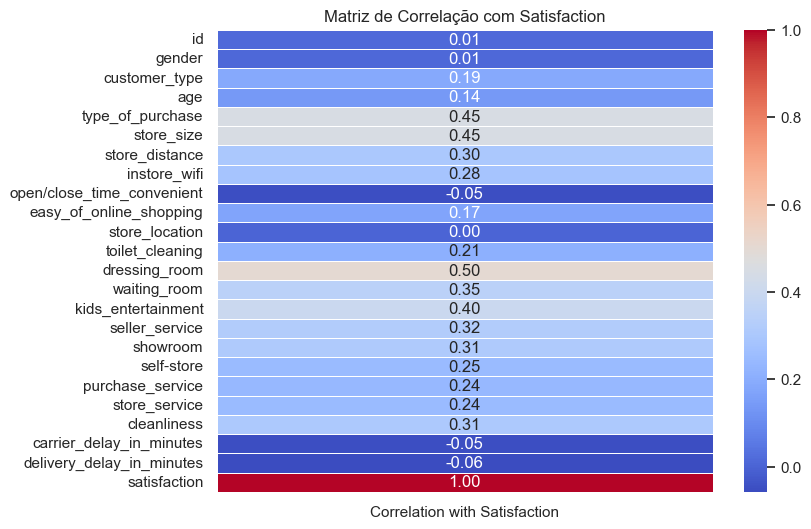

In [15]:
# Assuming that 'satisfaction' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['satisfaction'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with Satisfaction']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com Satisfaction')
plt.show()

### 1.5.1 Correlated colum ``store_location``

**Notice:** We identified that 'instore_wifi', 'open/close_time_convenient' and 'easy_of_online_shopping' are more related to store_location

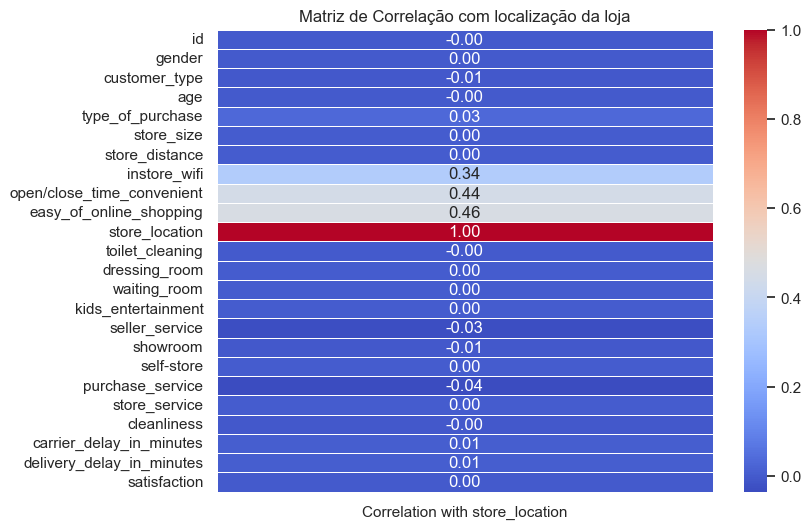

In [16]:
# Assuming that 'store_location' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['store_location'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with store_location']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com localização da loja')
plt.show()

### 1.5.2 Correlated colum ``customer_type``

**Notice:** We identified that 'age' and 'type_of_purchase' are more related to 'customer_type'

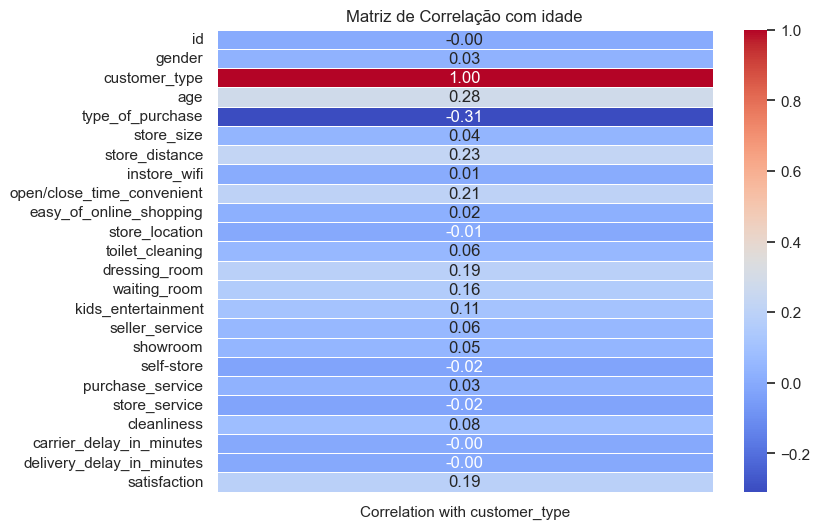

In [17]:
# Assuming that 'customer_type' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['customer_type'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with customer_type']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.3 Correlated colum ``carrier_delay_in_minutes``

**Notice:** We identified that 'delivery_delay_in_minutes' are more related to 'carrier_delay_in_minutes'

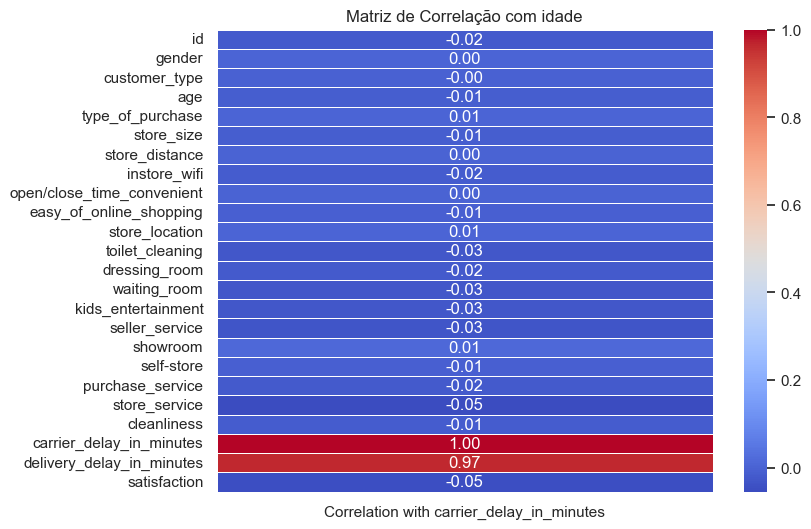

In [18]:
# Assuming that 'carrier_delay_in_minutes' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['carrier_delay_in_minutes'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with carrier_delay_in_minutes']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.4 Correlated colum ``delivery_delay_in_minutes``

**Notice:** We identified that 'carrier_delay_in_minutes' are more related to 'delivery_delay_in_minutes'

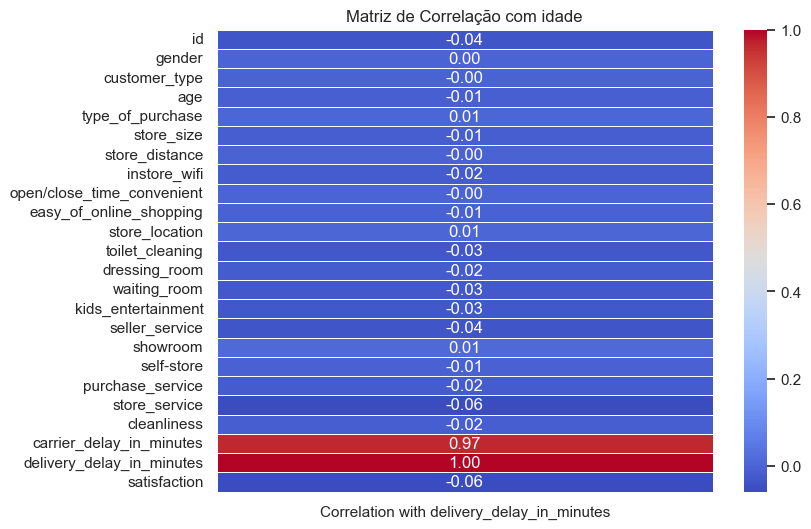

In [19]:
# Assuming that 'delivery_delay_in_minutes' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['delivery_delay_in_minutes'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with delivery_delay_in_minutes']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.5 Correlated colum ``type_of_purchase``

**Notice:** We identified that 'store_size', 'customer_type' and 'store_distance' are more related to 'type_of_purchase'

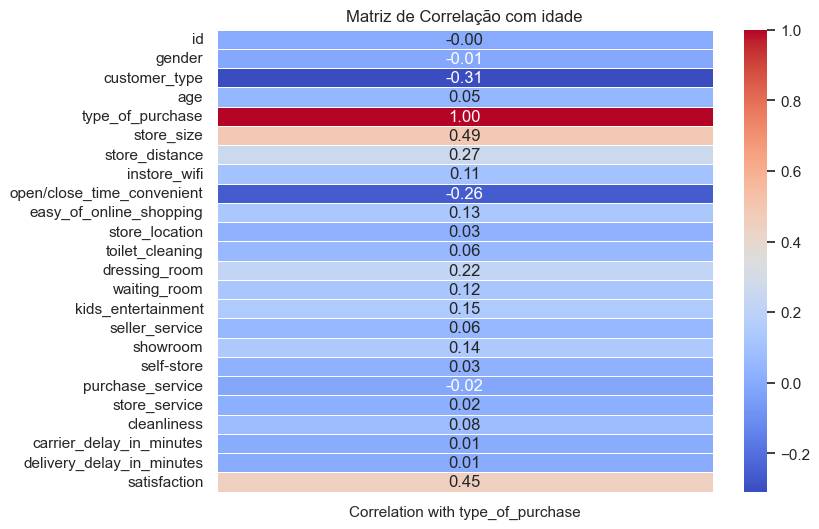

In [20]:
# Assuming that 'type_of_purchase' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['type_of_purchase'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with type_of_purchase']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.6 Correlated colum ``store_size``

**Notice:** We identified that 'store_distance', 'type_of_purchase' and 'dressing_room' are more related to 'store_size'

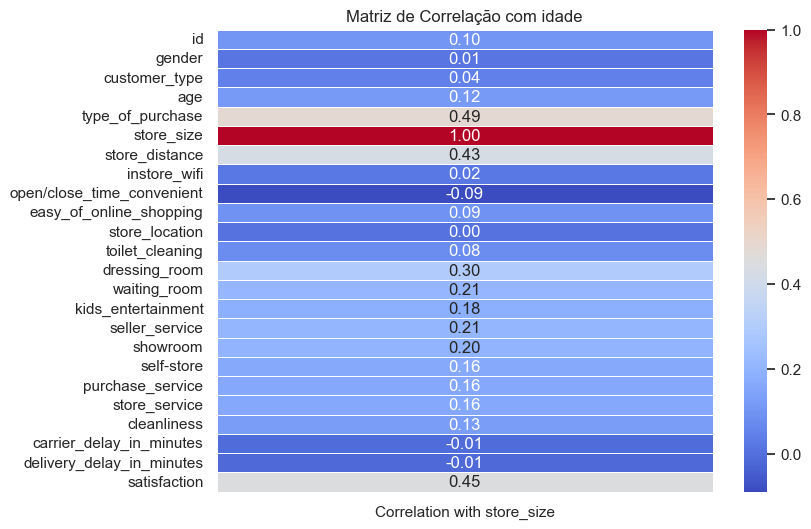

In [21]:
# Assuming that 'store_size' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['store_size'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with store_size']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

### 1.5.7 Correlated colum ``dressing_room``

**Notice:** We identified that 'waiting_room', 'easy_of_online_shopping', 'instore_wifi', 'cleanliness', 'kids_entertainment' and 'store_size' are more related to 'dressing_room'

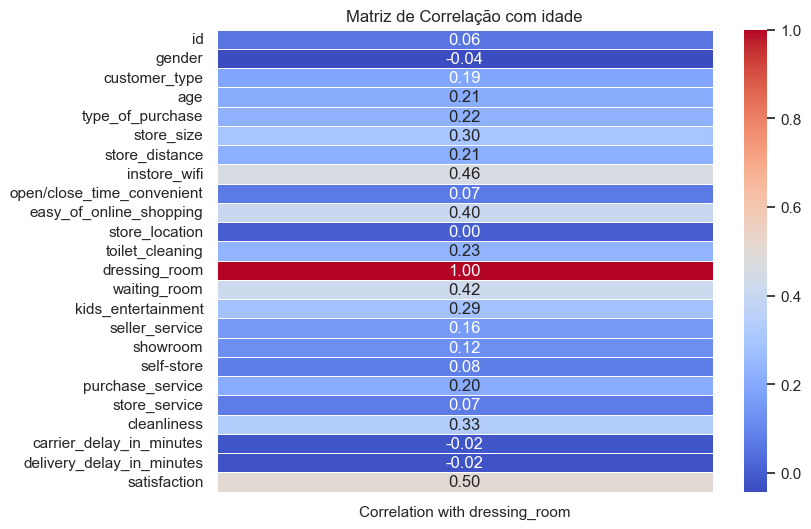

In [22]:
# Assuming that 'dressing_room' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['dressing_room'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with dressing_room']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com idade')
plt.show()

## 1.6 Pandas Profiling

In [23]:
# profile = ProfileReport(df1, title="Profiling Report")

In [24]:
# profile.to_file('ProfilingReport.html')

## 1.7 SweetViz

### 1.7.1 GerandoRelatorio SweetViz

In [25]:
# my_report = sv.analyze(source=df1, target_feat='satisfaction', pairwise_analysis='on')
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

## 1.8 Univariate analysis

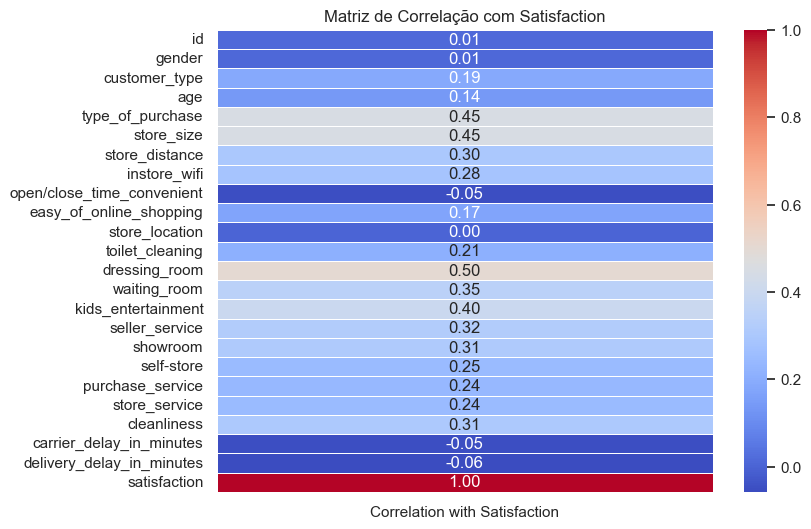

In [26]:
# Assuming that 'satisfaction' is the column of interest in your DataFrame df1.
correlation_matrix = df1.corrwith(df1['satisfaction'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with Satisfaction']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com Satisfaction')
plt.show()

In [27]:
df1.columns

Index(['id', 'gender', 'customer_type', 'age', 'type_of_purchase',
       'store_size', 'store_distance', 'instore_wifi',
       'open/close_time_convenient', 'easy_of_online_shopping',
       'store_location', 'toilet_cleaning', 'dressing_room', 'waiting_room',
       'kids_entertainment', 'seller_service', 'showroom', 'self-store',
       'purchase_service', 'store_service', 'cleanliness',
       'carrier_delay_in_minutes', 'delivery_delay_in_minutes',
       'satisfaction'],
      dtype='object')

### 1.8.1 Column - Gender

In [28]:
# gender = 0 = Female and 1 = Male
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'gender', 'satisfaction']].groupby(['gender', 'satisfaction']).count().reset_index()
df_aux.columns = ['gender', 'satisfaction', 'count']

df_aux['gender']        =   df_aux['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')
df_aux['satisfaction']  =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

gender     satisfaction  count
0  Female  No Satisfaction  30193
1  Female     Satisfaction  22534
2    Male  No Satisfaction  28686
3    Male     Satisfaction  22491

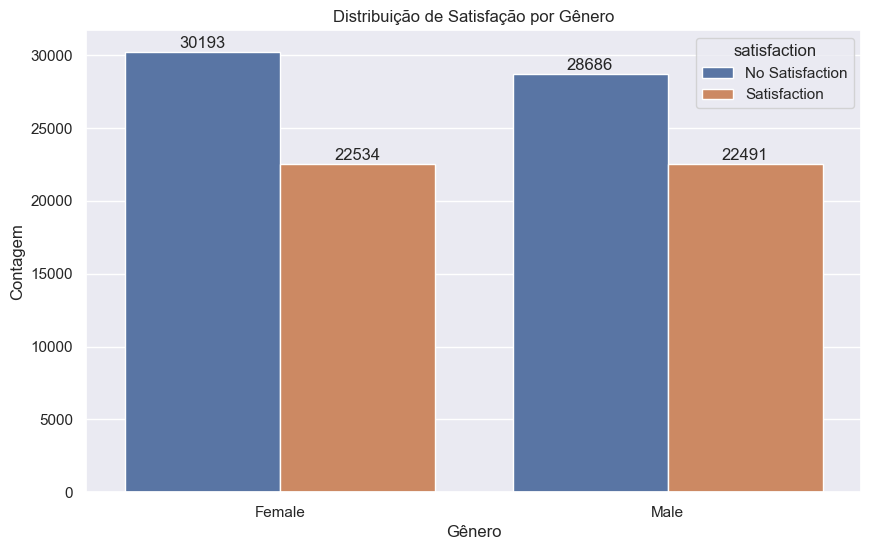

In [29]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='gender', y='count', hue='satisfaction', data=df_aux)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# Adicionar valores exatos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 3), textcoords='offset points', ha='center')

# Mostrar o gráfico
plt.show()

### 1.8.2 Column - customer_type

In [30]:
df1['customer_type'].unique()

array([1, 0], dtype=int64)

In [31]:
# customer_type = 0 = disloyal Customer and 1 = Loyal Customer
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'customer_type', 'satisfaction']].groupby(['customer_type', 'satisfaction']).count().reset_index()
df_aux.columns = ['customer_type', 'satisfaction', 'count']

df_aux['customer_type']     =   df_aux['customer_type'].apply(lambda x: 'Disloyal Customer' if x == 0 else 'Loyal Customer')
df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

customer_type     satisfaction  count
0  Disloyal Customer  No Satisfaction  14489
1  Disloyal Customer     Satisfaction   4492
2     Loyal Customer  No Satisfaction  44390
3     Loyal Customer     Satisfaction  40533

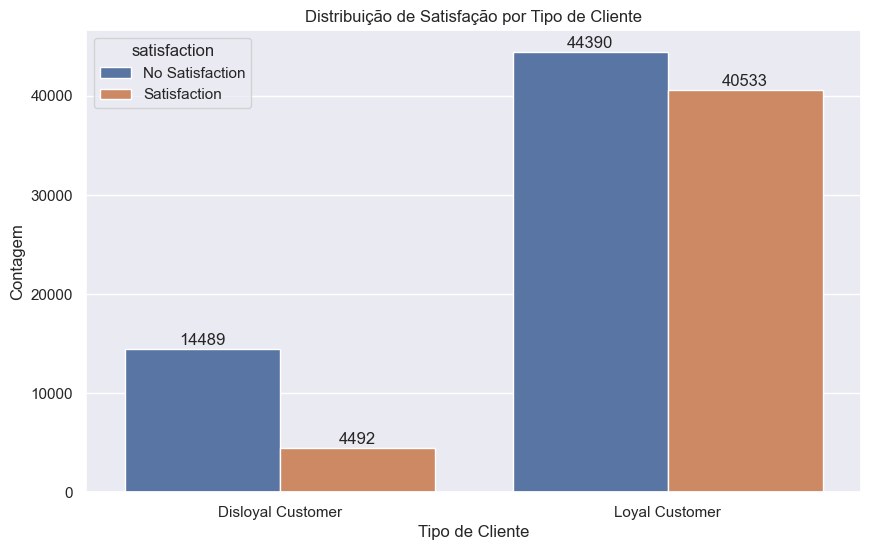

In [32]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='customer_type', y='count', hue='satisfaction', data=df_aux)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Contagem')

# Adicionar valores exatos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 3), textcoords='offset points', ha='center')

# Mostrar o gráfico
plt.show()

### 1.8.3 Column - age

In [33]:
df1['age'].sort_values().unique()

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 85], dtype=int64)

In [34]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'age', 'satisfaction']].groupby(['age', 'satisfaction']).count().reset_index()
df_aux.columns = ['age', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

age     satisfaction  count
0      7  No Satisfaction    506
1      7     Satisfaction     56
2      8  No Satisfaction    571
3      8     Satisfaction     69
4      9  No Satisfaction    597
5      9     Satisfaction     95
6     10  No Satisfaction    593
7     10     Satisfaction     90
8     11  No Satisfaction    569
9     11     Satisfaction    109
10    12  No Satisfaction    529
11    12     Satisfaction    106
12    13  No Satisfaction    535
13    13     Satisfaction     98
14    14  No Satisfaction    605
15    14     Satisfaction    102
16    15  No Satisfaction    668
17    15     Satisfaction    150
18    16  No Satisfaction    715
19    16     Satisfaction    184
20    17  No Satisfaction    743
21    17     Satisfaction    241
22    18  No Satisfaction    739
23    18     Satisfaction    239
24    19  No Satisfaction    682
25    19     Satisfaction    222
26    20  No Satisfaction   1057
27    20     Satisfaction    463
28    21  No Satisfaction   1047
29    21     Satisfaction    460
30    22  No Satisfaction   1425
31    22     Satisfaction    926
32    23  No Satisfaction   1426
33    23     Satisfaction    920
34    24  No Satisfaction   1388
35    24     Satisfaction    890
36    25  No Satisfaction   1868
37    25     Satisfaction    930
38    26  No Satisfaction   1561
39    26     Satisfaction    728
40    27  No Satisfaction   1459
41    27     Satisfaction    727
42    28  No Satisfaction   1061
43    28     Satisfaction    646
44    29  No Satisfaction   1200
45    29     Satisfaction    732
46    30  No Satisfaction   1229
47    30     Satisfaction    801
48    31  No Satisfaction    908
49    31     Satisfaction    699
50    32  No Satisfaction    951
51    32     Satisfaction    619
52    33  No Satisfaction   1123
53    33     Satisfaction    728
54    34  No Satisfaction   1094
55    34     Satisfaction    659
56    35  No Satisfaction   1185
57    35     Satisfaction    738
58    36  No Satisfaction   1494
59    36     Satisfaction    825
60    37  No Satisfaction   1438
61    37     Satisfaction    878
62    38  No Satisfaction   1352
63    38     Satisfaction    969
64    39  No Satisfaction   1374
65    39     Satisfaction   1595
66    40  No Satisfaction   1100
67    40     Satisfaction   1474
68    41  No Satisfaction    963
69    41     Satisfaction   1493
70    42  No Satisfaction   1051
71    42     Satisfaction   1406
72    43  No Satisfaction    970
73    43     Satisfaction   1345
74    44  No Satisfaction   1047
75    44     Satisfaction   1435
76    45  No Satisfaction    999
77    45     Satisfaction   1340
78    46  No Satisfaction    884
79    46     Satisfaction   1325
80    47  No Satisfaction    976
81    47     Satisfaction   1353
82    48  No Satisfaction    993
83    48     Satisfaction   1316
84    49  No Satisfaction    942
85    49     Satisfaction   1284
86    50  No Satisfaction    918
87    50     Satisfaction   1159
88    51  No Satisfaction    849
89    51     Satisfaction   1259
90    52  No Satisfaction    852
91    52     Satisfaction   1207
92    53  No Satisfaction    796
93    53     Satisfaction   1108
94    54  No Satisfaction    811
95    54     Satisfaction   1051
96    55  No Satisfaction    835
97    55     Satisfaction   1031
98    56  No Satisfaction    809
99    56     Satisfaction   1049
100   57  No Satisfaction    762
101   57     Satisfaction   1097
102   58  No Satisfaction    783
103   58     Satisfaction    983
104   59  No Satisfaction    764
105   59     Satisfaction    980
106   60  No Satisfaction    769
107   60     Satisfaction    974
108   61  No Satisfaction    650
109   61     Satisfaction    256
110   62  No Satisfaction    664
111   62     Satisfaction    179
112   63  No Satisfaction    563
113   63     Satisfaction    198
114   64  No Satisfaction    564
115   64     Satisfaction    154
116   65  No Satisfaction    603
117   65     Satisfaction    139
118   66  No Satisfaction    551
119   66     Satisfaction    128
120   67  No

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


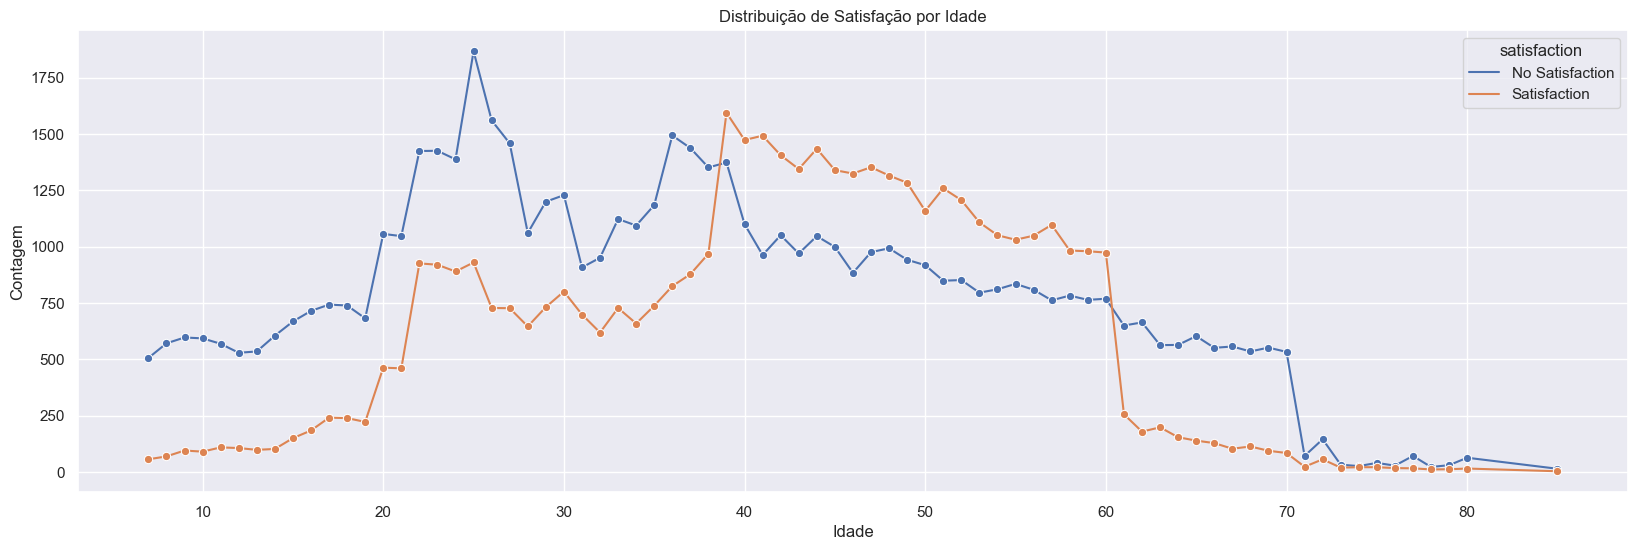

In [35]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='age', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

### 1.8.4 Column - type_of_purchase

In [36]:
df1['type_of_purchase'].unique()

array([0, 1], dtype=int64)

In [37]:
# type_of_purchase: 0 = Personal and 1 = Gift
# satisfaction: 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'type_of_purchase', 'satisfaction']].groupby(['type_of_purchase', 'satisfaction']).count().reset_index()
df_aux.columns = ['type_of_purchase', 'satisfaction', 'count']

df_aux['type_of_purchase']     =   df_aux['type_of_purchase'].apply(lambda x: 'Personal' if x == 0 else 'Gift')
df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

type_of_purchase     satisfaction  count
0         Personal  No Satisfaction  28970
1         Personal     Satisfaction   3279
2             Gift  No Satisfaction  29909
3             Gift     Satisfaction  41746

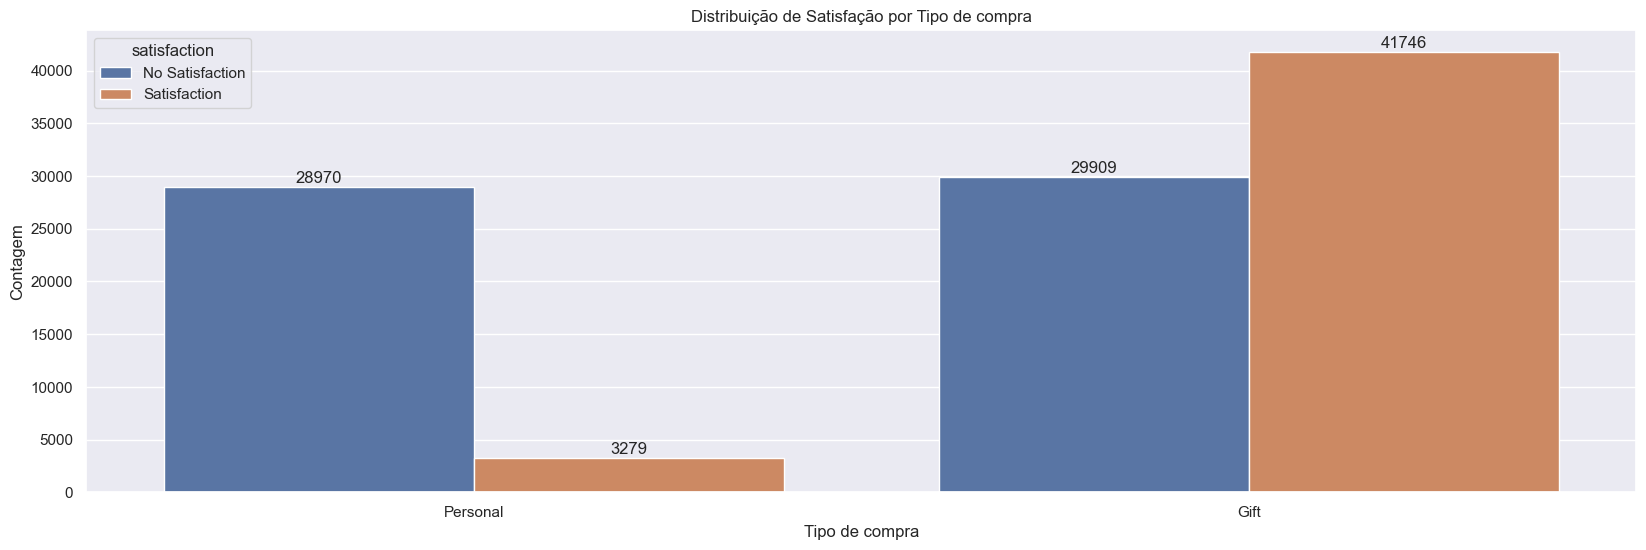

In [38]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='type_of_purchase', y='count', hue='satisfaction', data=df_aux)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Tipo de compra')
plt.xlabel('Tipo de compra')
plt.ylabel('Contagem')

# Adicionar valores exatos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 3), textcoords='offset points', ha='center')

# Mostrar o gráfico
plt.show()

### 1.8.5 Column - store_size

In [39]:
df1['store_size'].unique()

array([0, 2, 1], dtype=int64)

In [40]:
# store_size: 0 = Small, 1 = Medium and 2 = Large
# satisfaction: 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'store_size', 'satisfaction']].groupby(['store_size', 'satisfaction']).count().reset_index()
df_aux.columns = ['store_size', 'satisfaction', 'count']

df_aux['store_size'] = df_aux['store_size'].apply(lambda x: 'Small' if x == 0 else ('Medium' if x == 1 else 'Large'))
df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

store_size     satisfaction  count
0      Small  No Satisfaction   5650
1      Small     Satisfaction   1844
2     Medium  No Satisfaction  38044
3     Medium     Satisfaction   8701
4      Large  No Satisfaction  15185
5      Large     Satisfaction  34480

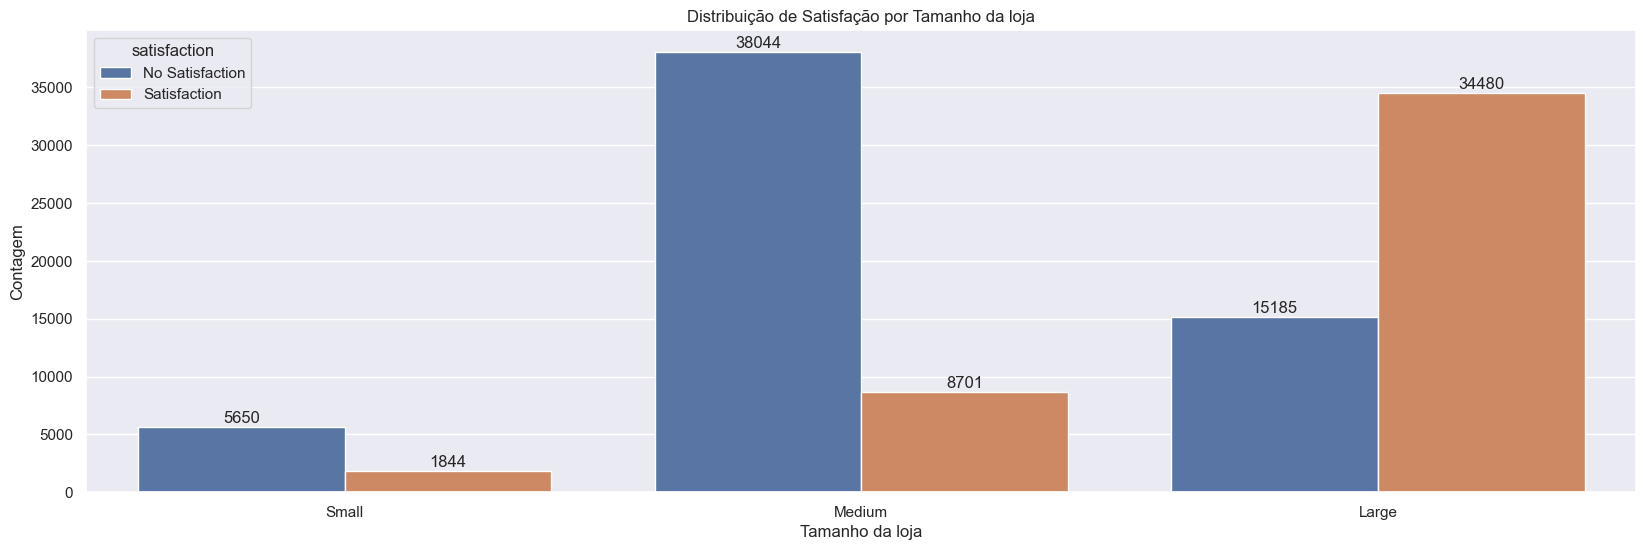

In [41]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.barplot(x='store_size', y='count', hue='satisfaction', data=df_aux)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Tamanho da loja')
plt.xlabel('Tamanho da loja')
plt.ylabel('Contagem')

# Adicionar valores exatos nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 3), textcoords='offset points', ha='center')

# Mostrar o gráfico
plt.show()

### 1.8.6 Column - store_distance

In [42]:
df1['store_distance'].unique()

array([ 460,  235, 1142, ...,  974, 1479,  400], dtype=int64)

In [43]:
# satisfaction: 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'store_distance', 'satisfaction']].groupby(['store_distance', 'satisfaction']).count().reset_index()
df_aux.columns = ['store_distance', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

store_distance     satisfaction  count
0                 31  No Satisfaction      5
1                 31     Satisfaction      3
2                 56  No Satisfaction      4
3                 56     Satisfaction      4
4                 67  No Satisfaction     83
5                 67     Satisfaction     45
6                 73  No Satisfaction     42
7                 73     Satisfaction     17
8                 74  No Satisfaction     22
9                 74     Satisfaction      8
10                76     Satisfaction      1
11                77  No Satisfaction     32
12                77     Satisfaction      9
13                78  No Satisfaction     26
14                78     Satisfaction      4
15                80  No Satisfaction      1
16                80     Satisfaction      1
17                82  No Satisfaction      4
18                82     Satisfaction      3
19                83  No Satisfaction     21
20                83     Satisfaction     17
21                84  No Satisfaction     15
22                84     Satisfaction     21
23                86  No Satisfaction    104
24                86     Satisfaction     51
25                89  No Satisfaction    117
26                89     Satisfaction     61
27                90  No Satisfaction     13
28                90     Satisfaction      5
29                95  No Satisfaction     22
30                95     Satisfaction     19
31                96  No Satisfaction     19
32                96     Satisfaction      7
33                98  No Satisfaction      3
34                98     Satisfaction      2
35               100  No Satisfaction     13
36               100     Satisfaction      7
37               101  No Satisfaction    196
38               101     Satisfaction    116
39               102  No Satisfaction    145
40               102     Satisfaction     94
41               103  No Satisfaction      1
42               106  No Satisfaction     59
43               106     Satisfaction     36
44               107  No Satisfaction      9
45               107     Satisfaction      5
46               108  No Satisfaction     23
47               108     Satisfaction     25
48               109  No Satisfaction    190
49               109     Satisfaction    110
50               110  No Satisfaction     56
51               110     Satisfaction     35
52               111     Satisfaction      1
53               112  No Satisfaction      2
54               112     Satisfaction      5
55               113  No Satisfaction     38
56               113     Satisfaction     20
57               114  No Satisfaction     14
58               114     Satisfaction      8
59               115  No Satisfaction      5
60               115     Satisfaction      8
61               116  No Satisfaction     50
62               116     Satisfaction     26
63               117  No Satisfaction      1
64               118  No Satisfaction     15
65               118     Satisfaction      6
66               119  No Satisfaction     54
67               119     Satisfaction     33
68               120  No Satisfaction     16
69               120     Satisfaction     17
70               121  No Satisfaction      9
71               121     Satisfaction      9
72               122  No Satisfaction     21
73               122     Satisfaction     10
74               123  No Satisfaction      4
75               123     Satisfaction      6
76               125  No Satisfaction    115
77               125     Satisfaction     61
78               126  No Satisfaction      7
79               126     Satisfaction      4
80               127  No Satisfaction     28
81               127     Satisfaction     13
82               128  No Satisfaction     10
83               128     Satisfaction      7
84               129  No Satisfaction     50
85               129     Satisfaction     33
86               130  No Satisfaction     81
87               130     Satisfaction     35
8

In [44]:
# Pivotar os dados para ter 'No Satisfaction' e 'Satisfaction' como colunas
df_pivot                                =   df_aux.pivot(index='store_distance', columns='satisfaction', values='count').fillna(0).reset_index()

# Tipo da coluna para inteiro
df_pivot['No Satisfaction']             =   df_pivot['No Satisfaction'].astype('int64')
df_pivot['Satisfaction']                =   df_pivot['Satisfaction'].astype('int64')

# Calcular a porcentagem
df_pivot['total']                       =   df_pivot['No Satisfaction'] + df_pivot['Satisfaction']
df_pivot['porcentagem_insatisfeito']    =   round((df_pivot['No Satisfaction'] / df_pivot['total']) * 100, 2)
df_pivot['porcentagem_satisfeito']      =   round((df_pivot['Satisfaction'] / df_pivot['total']) * 100, 2)

In [45]:
df_pivot[df_pivot['porcentagem_insatisfeito'] < df_pivot['porcentagem_satisfeito']]

satisfaction  store_distance  No Satisfaction  Satisfaction  total  porcentagem_insatisfeito  porcentagem_satisfeito
5                         76                0             1      1                      0.00                  100.00
11                        84               15            21     36                     41.67                   58.33
24                       108               23            25     48                     47.92                   52.08
27                       111                0             1      1                      0.00                  100.00
28                       112                2             5      7                     28.57                   71.43
31                       115                5             8     13                     38.46                   61.54
36                       120               16            17     33                     48.48                   51.52
39                       123                4             6     10                     40.00                   60.00
55                       141               16            17     33                     48.48                   51.52
75                       161                0             1      1                      0.00                  100.00
83                       170               26            31     57                     45.61                   54.39
84                       171                3             6      9                     33.33                   66.67
91                       180                2             4      6                     33.33                   66.67
104                      194                6            11     17                     35.29                   64.71
128                      218                0             2      2                      0.00                  100.00
130                      221               18            22     40                     45.00                   55.00
134                      225                0             2      2                      0.00                  100.00
171                      263                1             2      3                     33.33                   66.67
175                      267                1             6      7                     14.29                   85.71
186                      279                5             9     14                     35.71                   64.29
246                      344                4             5      9                     44.44                   55.56
248                      346               17            18     35                     48.57                   51.43
262                      360                0             1      1                      0.00                  100.00
269                      367                0             1      1                      0.00                  100.00
277                      375                2             3      5                     40.00                   60.00
280                      378                4             9     13                     30.77                   69.23
294                      394                0             1      1                      0.00                  100.00
300                      400                0             1      1                      0.00                  100.00
331                      433                9            18     27                     33.33                   66.67
364                      467                6             9     15                     40.00                   60.00
404                      513                0             1      1                      0.00                  100.00
408                      518                0             2      2                      0.00                  100.00
411                      521               14            23     37                     37.84                   62.16
417                   

In [46]:
df_pivot[df_pivot['porcentagem_insatisfeito'] > df_pivot['porcentagem_satisfeito']]

satisfaction  store_distance  No Satisfaction  Satisfaction  total  porcentagem_insatisfeito  porcentagem_satisfeito
0                         31                5             3      8                     62.50                   37.50
2                         67               83            45    128                     64.84                   35.16
3                         73               42            17     59                     71.19                   28.81
4                         74               22             8     30                     73.33                   26.67
6                         77               32             9     41                     78.05                   21.95
7                         78               26             4     30                     86.67                   13.33
9                         82                4             3      7                     57.14                   42.86
10                        83               21            17     38                     55.26                   44.74
12                        86              104            51    155                     67.10                   32.90
13                        89              117            61    178                     65.73                   34.27
14                        90               13             5     18                     72.22                   27.78
15                        95               22            19     41                     53.66                   46.34
16                        96               19             7     26                     73.08                   26.92
17                        98                3             2      5                     60.00                   40.00
18                       100               13             7     20                     65.00                   35.00
19                       101              196           116    312                     62.82                   37.18
20                       102              145            94    239                     60.67                   39.33
21                       103                1             0      1                    100.00                    0.00
22                       106               59            36     95                     62.11                   37.89
23                       107                9             5     14                     64.29                   35.71
25                       109              190           110    300                     63.33                   36.67
26                       110               56            35     91                     61.54                   38.46
29                       113               38            20     58                     65.52                   34.48
30                       114               14             8     22                     63.64                   36.36
32                       116               50            26     76                     65.79                   34.21
33                       117                1             0      1                    100.00                    0.00
34                       118               15             6     21                     71.43                   28.57
35                       119               54            33     87                     62.07                   37.93
38                       122               21            10     31                     67.74                   32.26
40                       125              115            61    176                     65.34                   34.66
41                       126                7             4     11                     63.64                   36.36
42                       127               28            13     41                     68.29                   31.71
43                       128               10             7     17                     58.82                   41.18
44                    

In [47]:
df_pivot.dtypes

satisfaction
store_distance                int64
No Satisfaction               int64
Satisfaction                  int64
total                         int64
porcentagem_insatisfeito    float64
porcentagem_satisfeito      float64
dtype: object

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


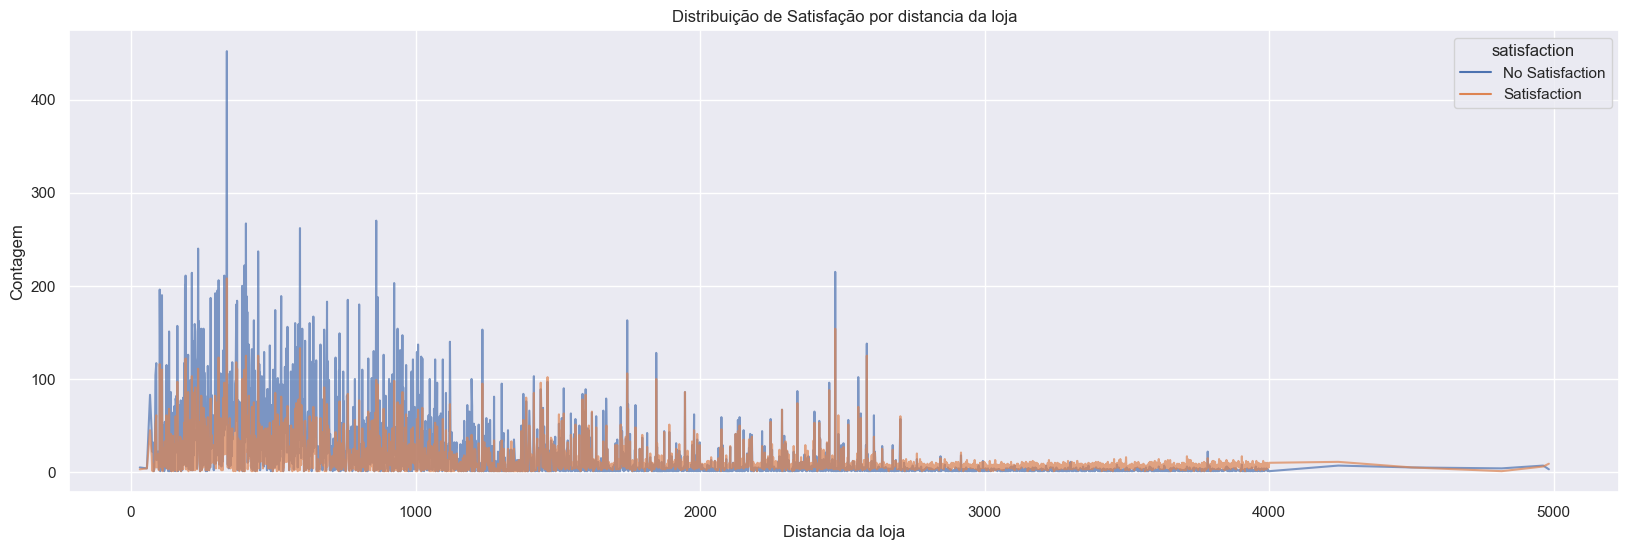

In [48]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='store_distance', y='count', hue='satisfaction', data=df_aux, alpha=0.7)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por distancia da loja')
plt.xlabel('Distancia da loja')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


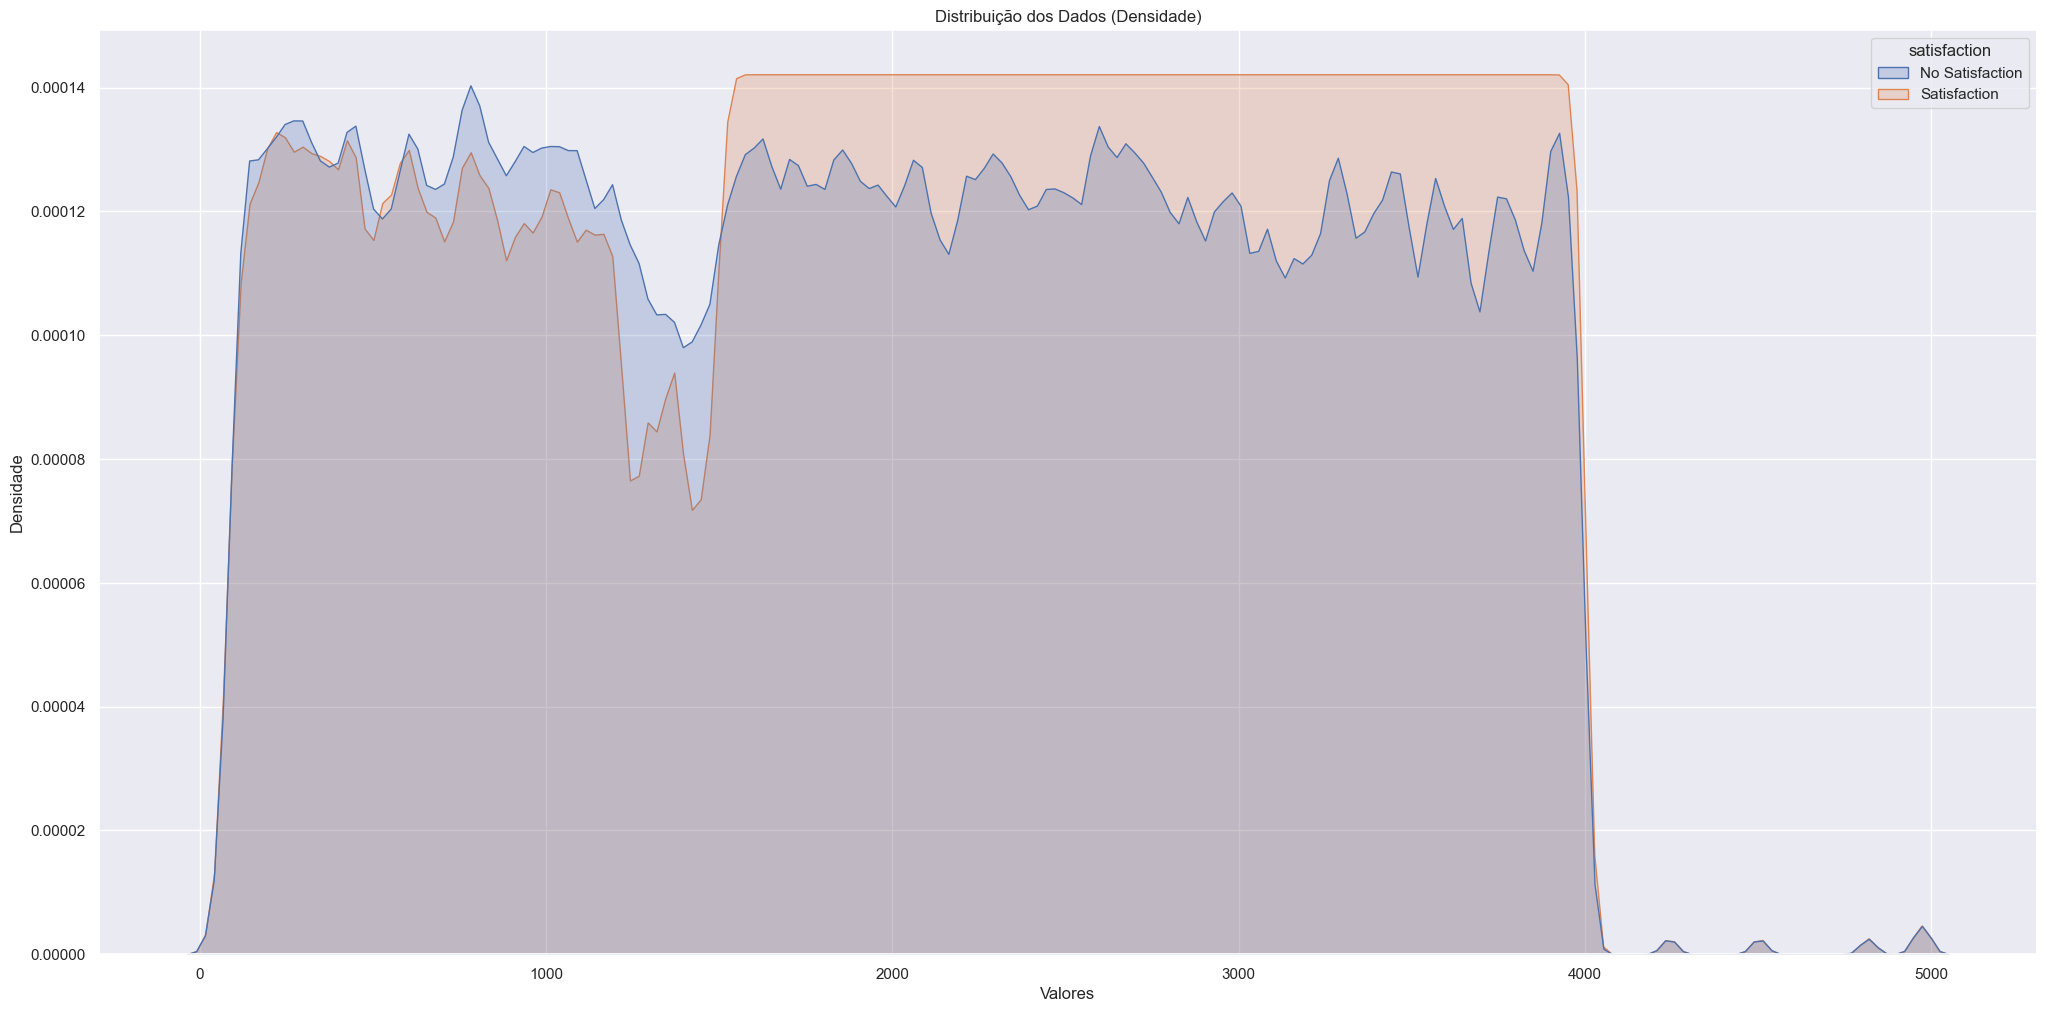

In [49]:
sns.kdeplot(
    data=df_aux,
    x='store_distance',
    hue='satisfaction',
    fill=True,
    color='skyblue',
    bw_adjust=.1
    # multiple='stack',
    # common_norm=False
)

plt.title('Distribuição dos Dados (Densidade)')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()

### 1.8.7 Column - instore_wifi

In [50]:
df1['instore_wifi'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [51]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'instore_wifi', 'satisfaction']].groupby(['instore_wifi', 'satisfaction']).count().reset_index()
df_aux.columns = ['instore_wifi', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

instore_wifi     satisfaction  count
0              0  No Satisfaction      8
1              0     Satisfaction   3095
2              1  No Satisfaction  12034
3              1     Satisfaction   5806
4              2  No Satisfaction  19407
5              2     Satisfaction   6423
6              3  No Satisfaction  19386
7              3     Satisfaction   6482
8              4  No Satisfaction   7938
9              4     Satisfaction  11856
10             5  No Satisfaction    106
11             5     Satisfaction  11363

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


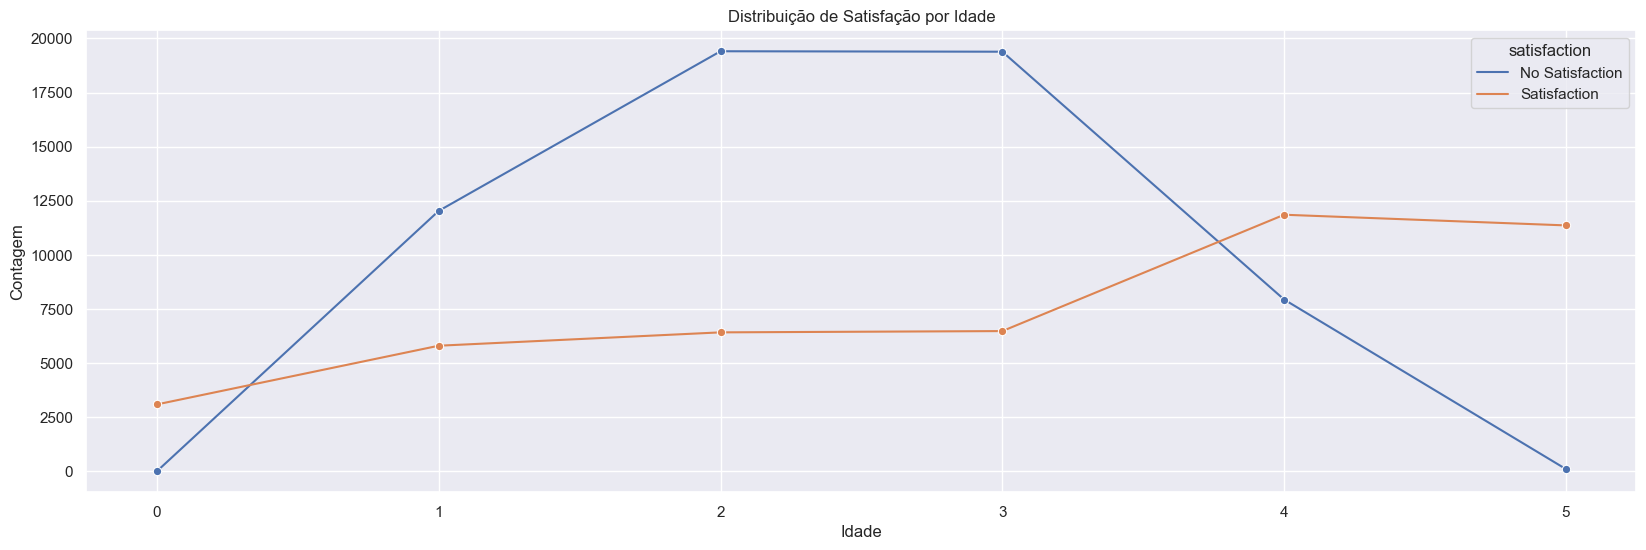

In [52]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='instore_wifi', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

### 1.8.8 Column - open/close_time_convenient

In [53]:
df1['open/close_time_convenient'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [54]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'open/close_time_convenient', 'satisfaction']].groupby(['open/close_time_convenient', 'satisfaction']).count().reset_index()
df_aux.columns = ['open/close_time_convenient', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

open/close_time_convenient     satisfaction  count
0                            0  No Satisfaction   2780
1                            0     Satisfaction   2520
2                            1  No Satisfaction   7957
3                            1     Satisfaction   7541
4                            2  No Satisfaction   9534
5                            2     Satisfaction   7657
6                            3  No Satisfaction  10093
7                            3     Satisfaction   7873
8                            4  No Satisfaction  15640
9                            4     Satisfaction   9906
10                           5  No Satisfaction  12875
11                           5     Satisfaction   9528

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


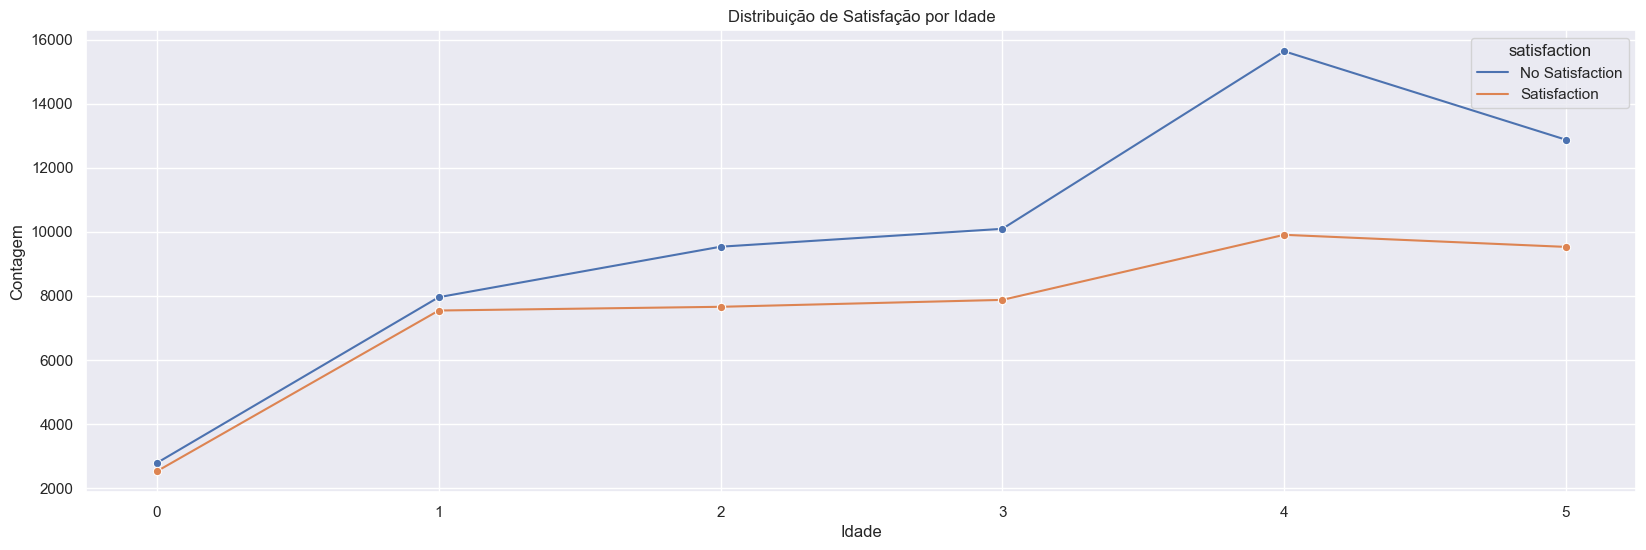

In [55]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='open/close_time_convenient', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

### 1.8.9 Column - easy_of_online_shopping

In [56]:
df1['easy_of_online_shopping'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [57]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'easy_of_online_shopping', 'satisfaction']].groupby(['easy_of_online_shopping', 'satisfaction']).count().reset_index()
df_aux.columns = ['easy_of_online_shopping', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

easy_of_online_shopping     satisfaction  count
0                         0  No Satisfaction   1507
1                         0     Satisfaction   2980
2                         1  No Satisfaction  10935
3                         1     Satisfaction   6590
4                         2  No Satisfaction  16720
5                         2     Satisfaction   7301
6                         3  No Satisfaction  16912
7                         3     Satisfaction   7537
8                         4  No Satisfaction   9180
9                         4     Satisfaction  10391
10                        5  No Satisfaction   3625
11                        5     Satisfaction  10226

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


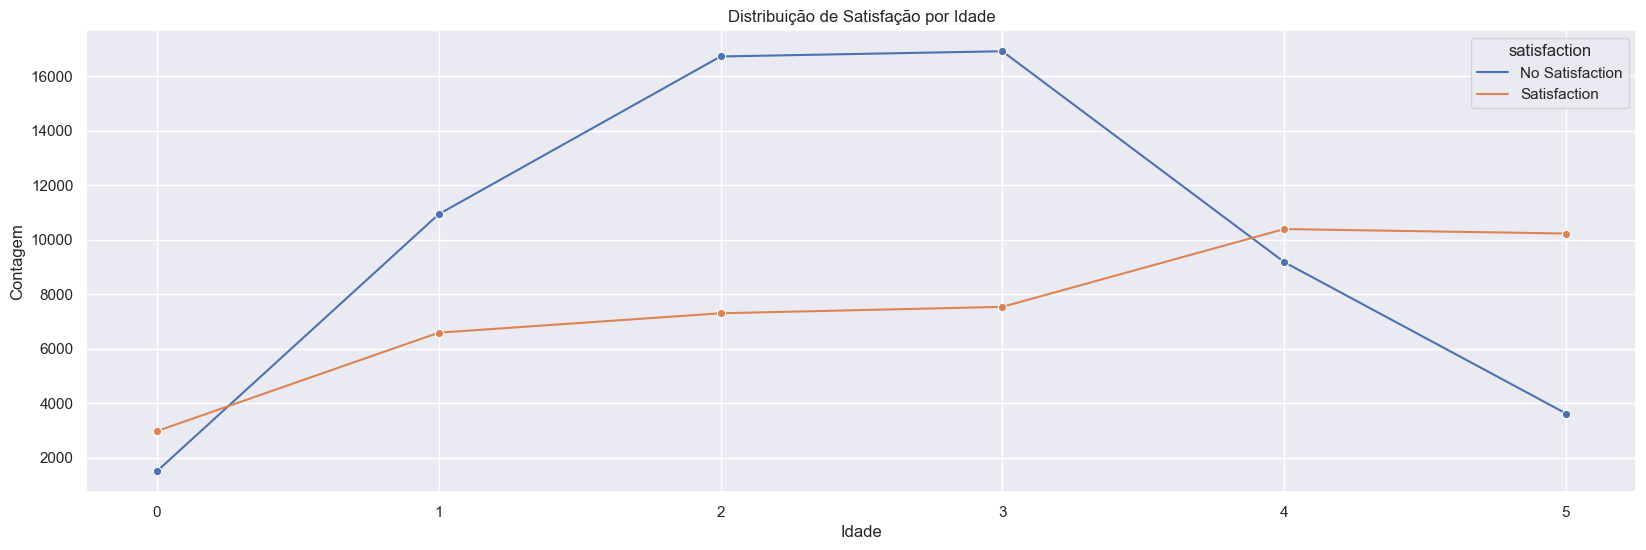

In [58]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='easy_of_online_shopping', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.10 Column - store_location

In [59]:
df1['store_location'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [60]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'store_location', 'satisfaction']].groupby(['store_location', 'satisfaction']).count().reset_index()
df_aux.columns = ['store_location', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

store_location     satisfaction  count
0                0     Satisfaction      1
1                1  No Satisfaction   8859
2                1     Satisfaction   8703
3                2  No Satisfaction  10494
4                2     Satisfaction   8965
5                3  No Satisfaction  18655
6                3     Satisfaction   9922
7                4  No Satisfaction  14936
8                4     Satisfaction   9490
9                5  No Satisfaction   5935
10               5     Satisfaction   7944

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


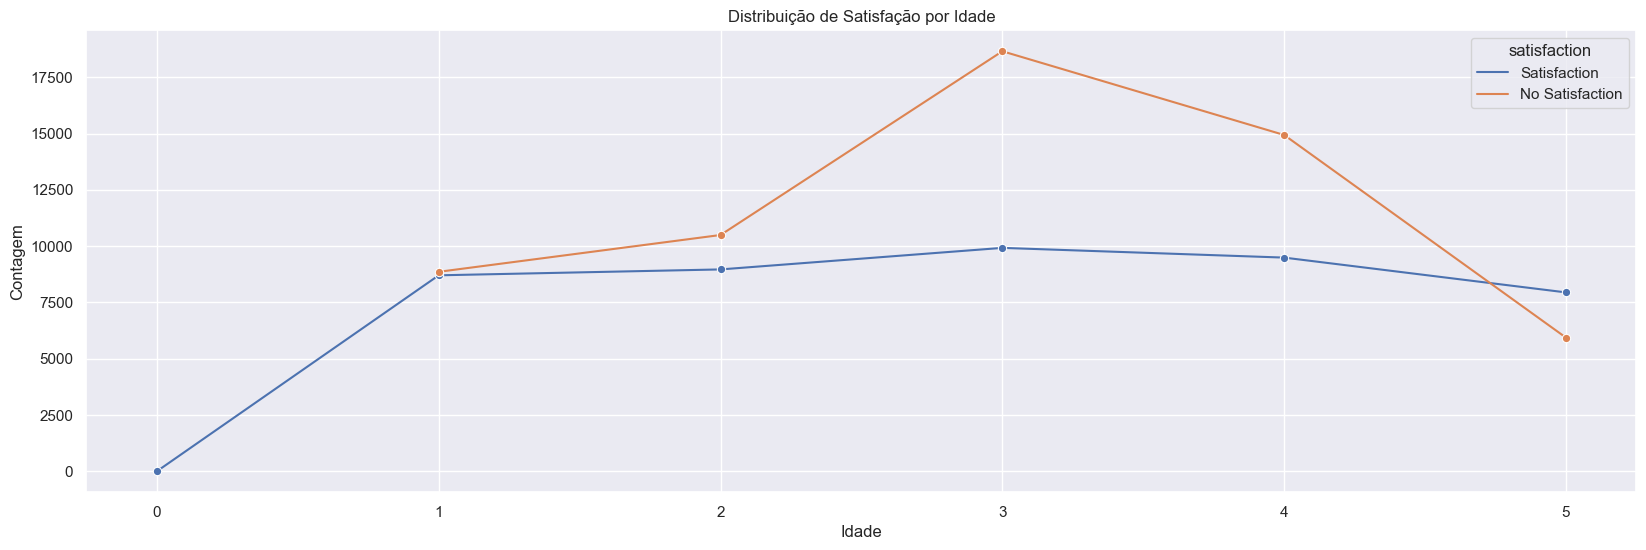

In [61]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='store_location', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.11 Column - toilet_cleaning

In [62]:
df1['toilet_cleaning'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [63]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'toilet_cleaning', 'satisfaction']].groupby(['toilet_cleaning', 'satisfaction']).count().reset_index()
df_aux.columns = ['toilet_cleaning', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

toilet_cleaning     satisfaction  count
0                 0  No Satisfaction     57
1                 0     Satisfaction     50
2                 1  No Satisfaction  10269
3                 1     Satisfaction   2568
4                 2  No Satisfaction  13458
5                 2     Satisfaction   8530
6                 3  No Satisfaction  13461
7                 3     Satisfaction   8839
8                 4  No Satisfaction  11571
9                 4     Satisfaction  12788
10                5  No Satisfaction  10063
11                5     Satisfaction  12250

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


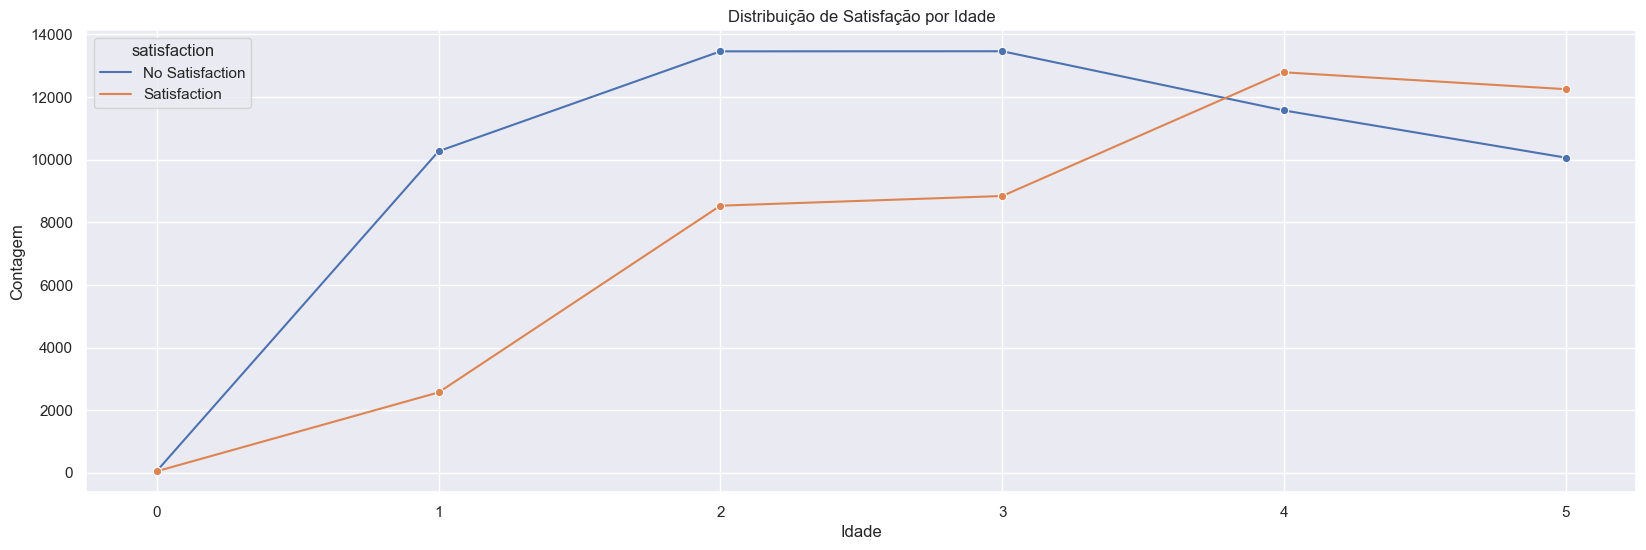

In [64]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='toilet_cleaning', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

### 1.8.12 Column - dressing_room

In [65]:
df1['dressing_room'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [66]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'dressing_room', 'satisfaction']].groupby(['dressing_room', 'satisfaction']).count().reset_index()
df_aux.columns = ['dressing_room', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

dressing_room     satisfaction  count
0               0  No Satisfaction   1077
1               0     Satisfaction   1351
2               1  No Satisfaction   9219
3               1     Satisfaction   1473
4               2  No Satisfaction  15486
5               2     Satisfaction   2019
6               3  No Satisfaction  18845
7               3     Satisfaction   2959
8               4  No Satisfaction  11596
9               4     Satisfaction  19166
10              5  No Satisfaction   2656
11              5     Satisfaction  18057

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


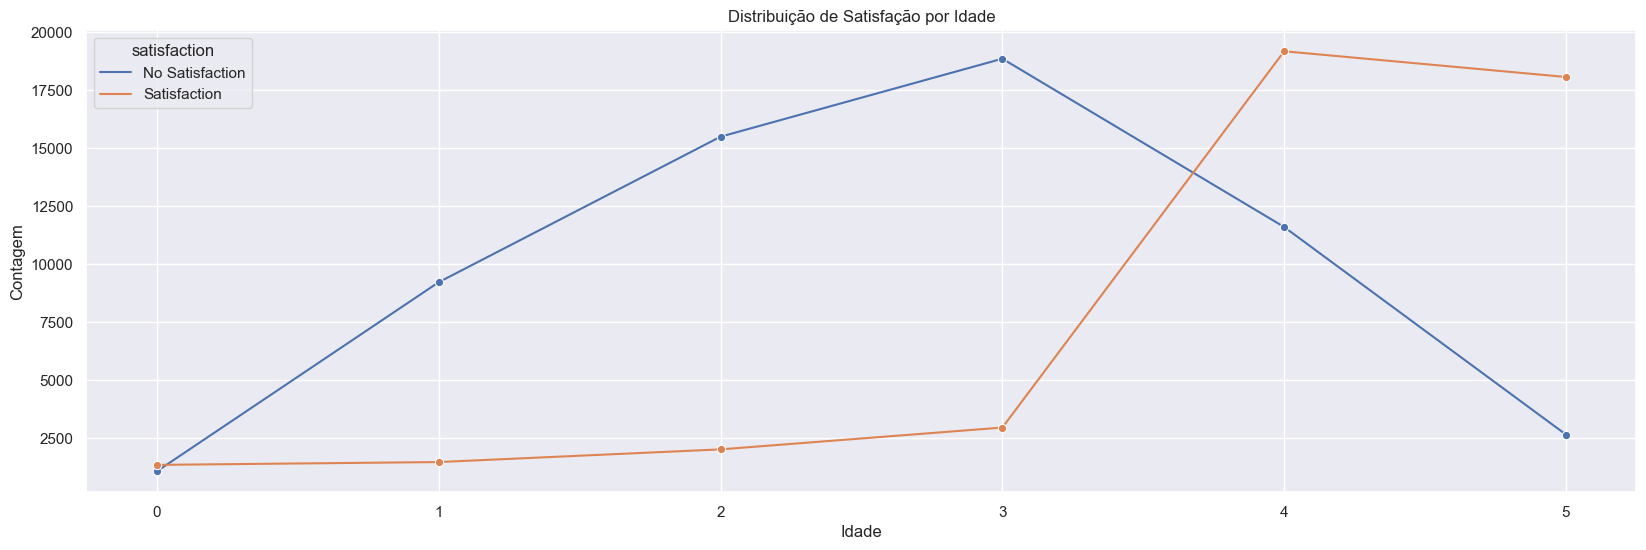

In [67]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='dressing_room', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.13 Column - waiting_room

In [68]:
df1['waiting_room'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [69]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'waiting_room', 'satisfaction']].groupby(['waiting_room', 'satisfaction']).count().reset_index()
df_aux.columns = ['waiting_room', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

waiting_room     satisfaction  count
0              0  No Satisfaction      1
1              1  No Satisfaction   9380
2              1     Satisfaction   2695
3              2  No Satisfaction  11558
4              2     Satisfaction   3339
5              3  No Satisfaction  14741
6              3     Satisfaction   3955
7              4  No Satisfaction  13940
8              4     Satisfaction  17825
9              5  No Satisfaction   9259
10             5     Satisfaction  17211

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


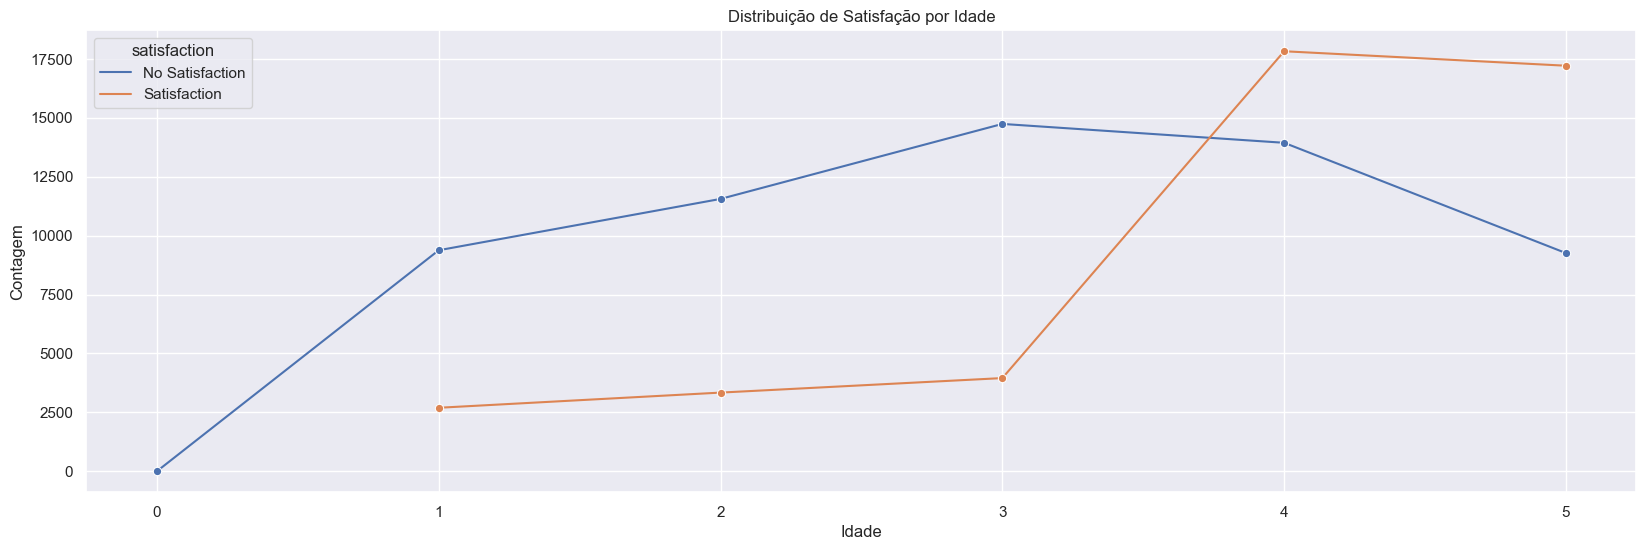

In [70]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='waiting_room', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.14 Column - kids_entertainment

In [71]:
df1['kids_entertainment'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [72]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'kids_entertainment', 'satisfaction']].groupby(['kids_entertainment', 'satisfaction']).count().reset_index()
df_aux.columns = ['kids_entertainment', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

kids_entertainment     satisfaction  count
0                    0  No Satisfaction     14
1                    1  No Satisfaction  10733
2                    1     Satisfaction   1745
3                    2  No Satisfaction  13875
4                    2     Satisfaction   3762
5                    3  No Satisfaction  13970
6                    3     Satisfaction   5169
7                    4  No Satisfaction  11423
8                    4     Satisfaction  18000
9                    5  No Satisfaction   8864
10                   5     Satisfaction  16349

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


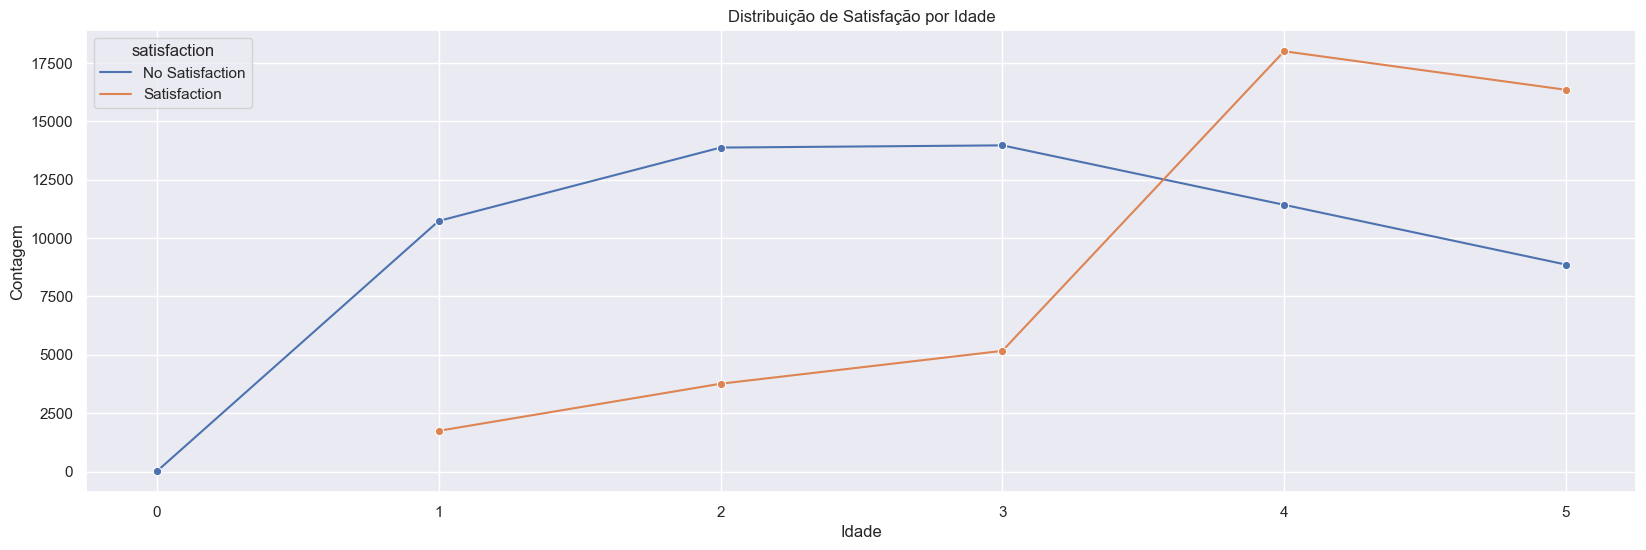

In [73]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='kids_entertainment', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.15 Column - seller_service

In [74]:
df1['seller_service'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [75]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'seller_service', 'satisfaction']].groupby(['seller_service', 'satisfaction']).count().reset_index()
df_aux.columns = ['seller_service', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

seller_service     satisfaction  count
0                0  No Satisfaction      3
1                1  No Satisfaction   9572
2                1     Satisfaction   2300
3                2  No Satisfaction  10927
4                2     Satisfaction   3754
5                3  No Satisfaction  15625
6                3     Satisfaction   7208
7                4  No Satisfaction  14296
8                4     Satisfaction  16571
9                5  No Satisfaction   8456
10               5     Satisfaction  15192

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


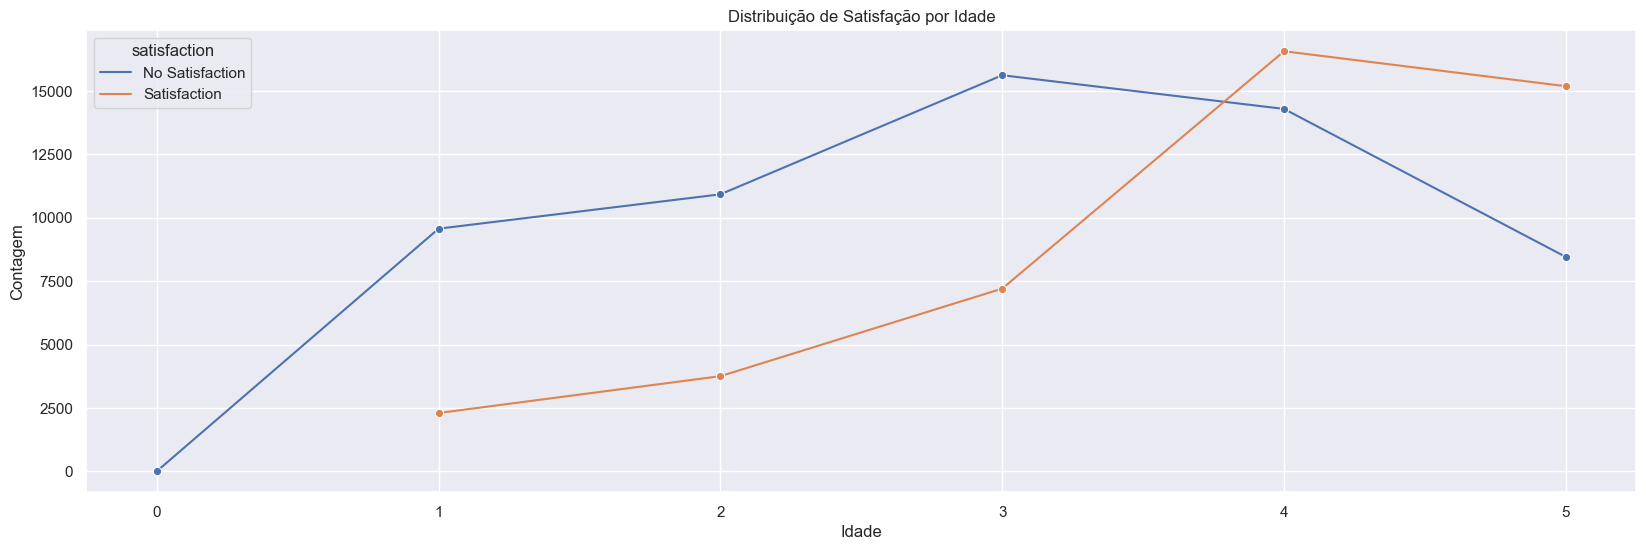

In [76]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='seller_service', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.16 Column - showroom

In [77]:
df1['showroom'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [78]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'showroom', 'satisfaction']].groupby(['showroom', 'satisfaction']).count().reset_index()
df_aux.columns = ['showroom', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

showroom     satisfaction  count
0          0  No Satisfaction    306
1          0     Satisfaction    166
2          1  No Satisfaction   8253
3          1     Satisfaction   2100
4          2  No Satisfaction  14162
5          2     Satisfaction   5363
6          3  No Satisfaction  14623
7          3     Satisfaction   5475
8          4  No Satisfaction  12025
9          4     Satisfaction  16764
10         5  No Satisfaction   9510
11         5     Satisfaction  15157

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


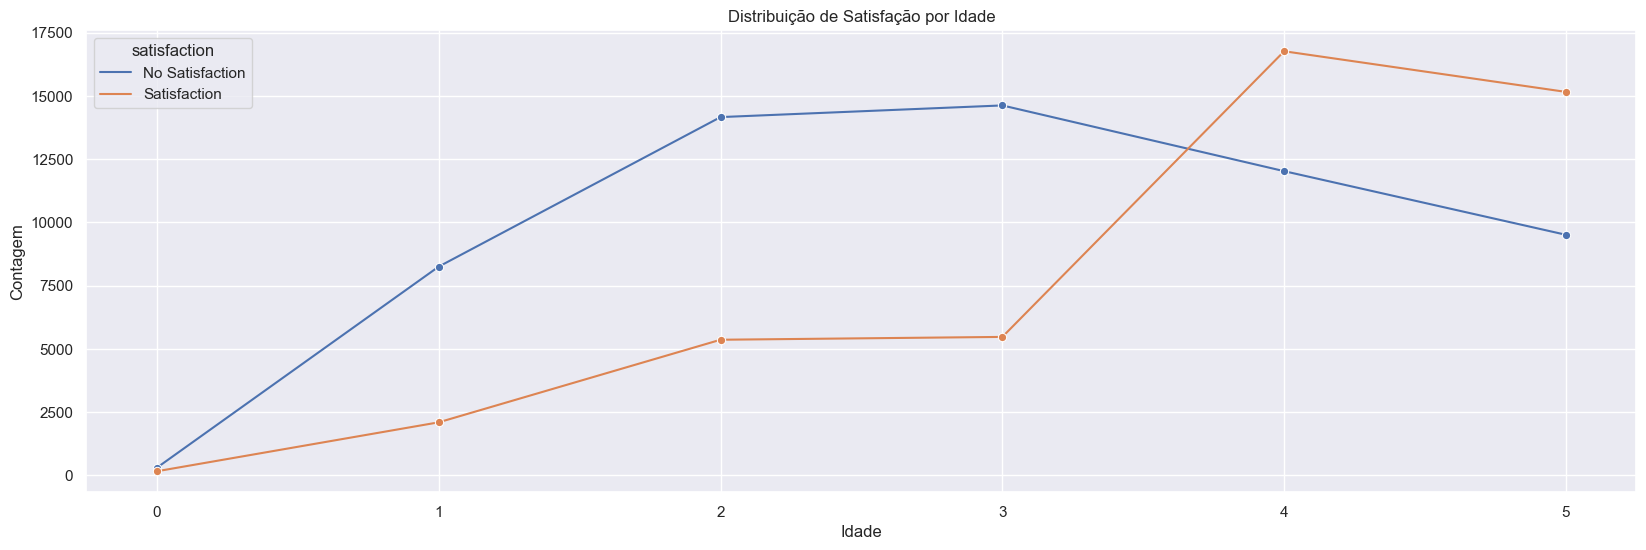

In [79]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='showroom', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.17 Column - self-store

In [80]:
df1['self-store'].sort_values().unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [81]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'self-store', 'satisfaction']].groupby(['self-store', 'satisfaction']).count().reset_index()
df_aux.columns = ['self-store', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

self-store     satisfaction  count
0           1  No Satisfaction   5083
1           1     Satisfaction   2154
2           2  No Satisfaction   8117
3           2     Satisfaction   3404
4           3  No Satisfaction  15766
5           3     Satisfaction   4866
6           4  No Satisfaction  19405
7           4     Satisfaction  17978
8           5  No Satisfaction  10508
9           5     Satisfaction  16623

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


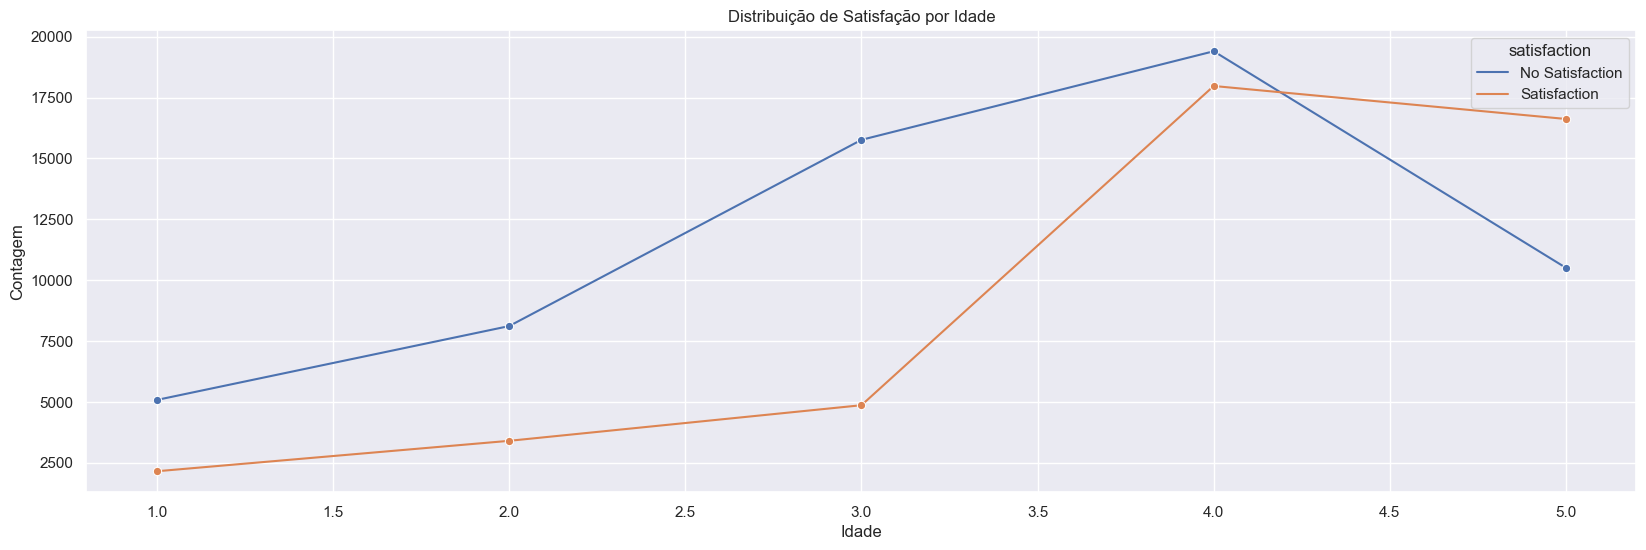

In [82]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='self-store', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.18 Column - purchase_service

In [83]:
df1['purchase_service'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [84]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'purchase_service', 'satisfaction']].groupby(['purchase_service', 'satisfaction']).count().reset_index()
df_aux.columns = ['purchase_service', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

purchase_service     satisfaction  count
0                  0  No Satisfaction      1
1                  1  No Satisfaction   9806
2                  1     Satisfaction   3084
3                  2  No Satisfaction   9640
4                  2     Satisfaction   3253
5                  3  No Satisfaction  15694
6                  3     Satisfaction  12752
7                  4  No Satisfaction  15692
8                  4     Satisfaction  13363
9                  5  No Satisfaction   8046
10                 5     Satisfaction  12573

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


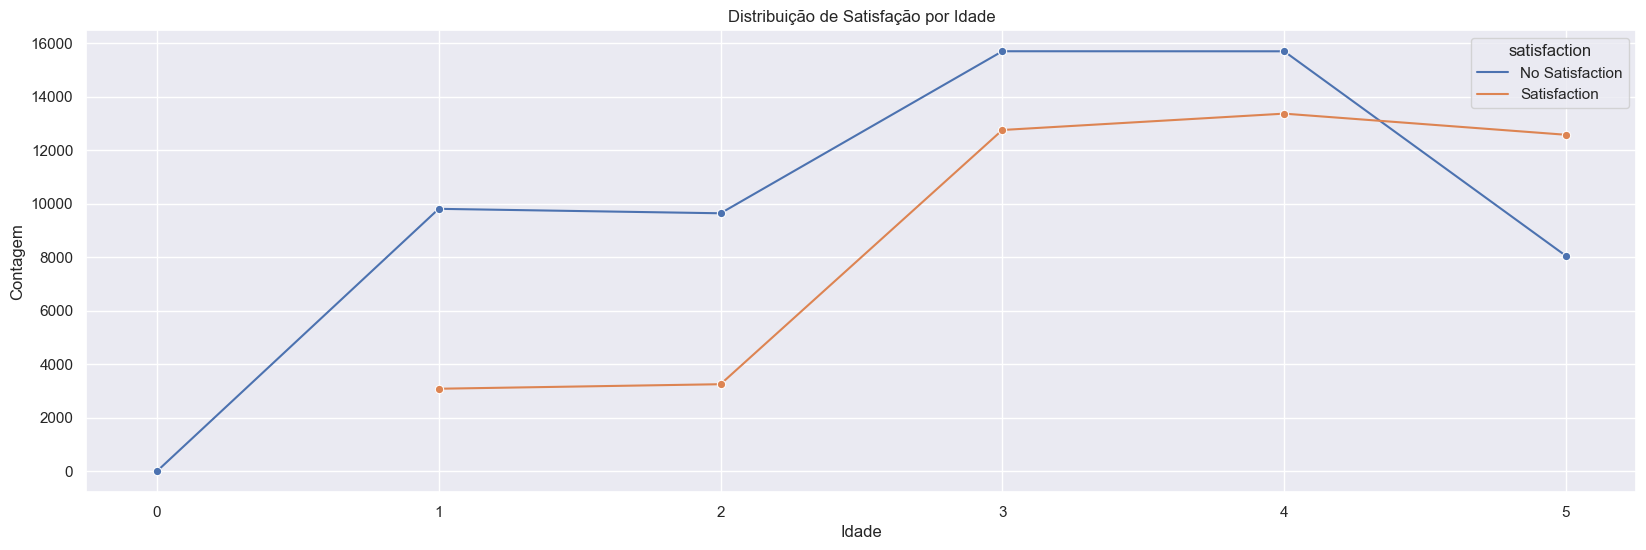

In [85]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='purchase_service', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.19 Column - store_service

In [86]:
df1['store_service'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [87]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'store_service', 'satisfaction']].groupby(['store_service', 'satisfaction']).count().reset_index()
df_aux.columns = ['store_service', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

store_service     satisfaction  count
0               0  No Satisfaction      3
1               1  No Satisfaction   5030
2               1     Satisfaction   2054
3               2  No Satisfaction   8006
4               2     Satisfaction   3451
5               3  No Satisfaction  15448
6               3     Satisfaction   4851
7               4  No Satisfaction  19816
8               4     Satisfaction  18129
9               5  No Satisfaction  10576
10              5     Satisfaction  16540

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


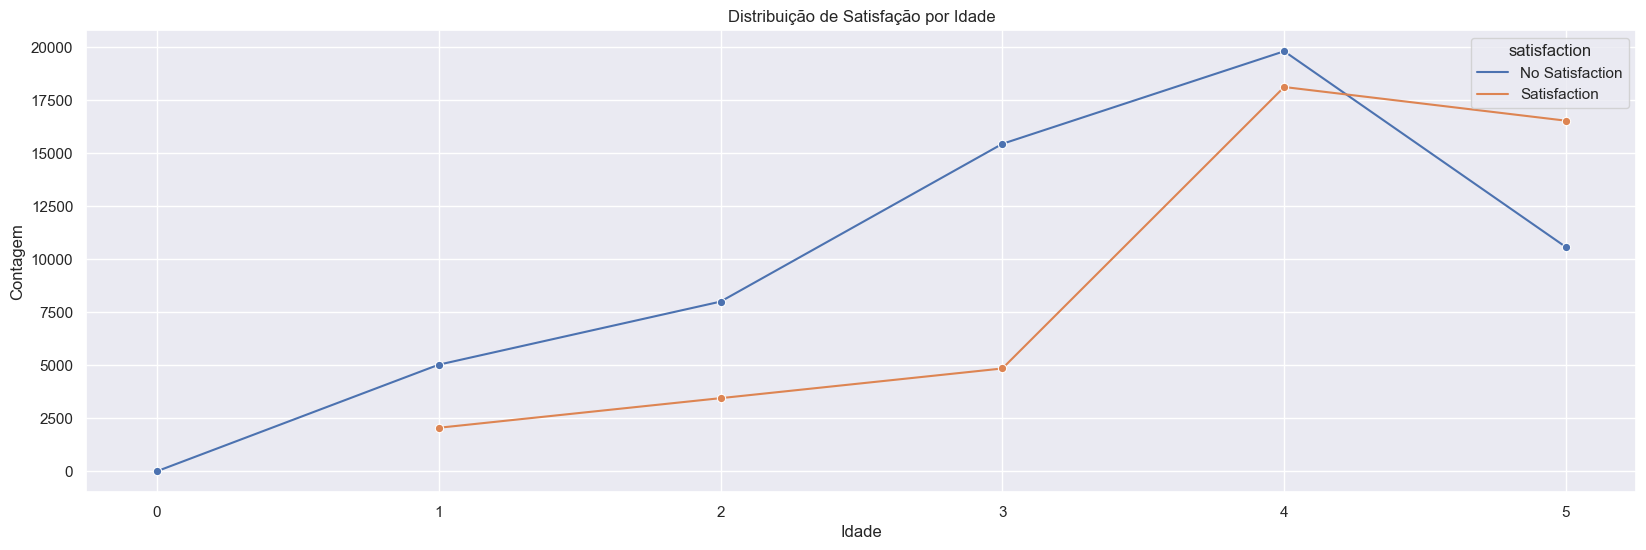

In [88]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='store_service', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.20 Column - cleanliness

In [89]:
df1['cleanliness'].sort_values().unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

In [90]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'cleanliness', 'satisfaction']].groupby(['cleanliness', 'satisfaction']).count().reset_index()
df_aux.columns = ['cleanliness', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

cleanliness     satisfaction  count
0             0  No Satisfaction     12
1             1  No Satisfaction  10705
2             1     Satisfaction   2613
3             2  No Satisfaction  12696
4             2     Satisfaction   3436
5             3  No Satisfaction  13961
6             3     Satisfaction  10613
7             4  No Satisfaction  12629
8             4     Satisfaction  14550
9             5  No Satisfaction   8876
10            5     Satisfaction  13813

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


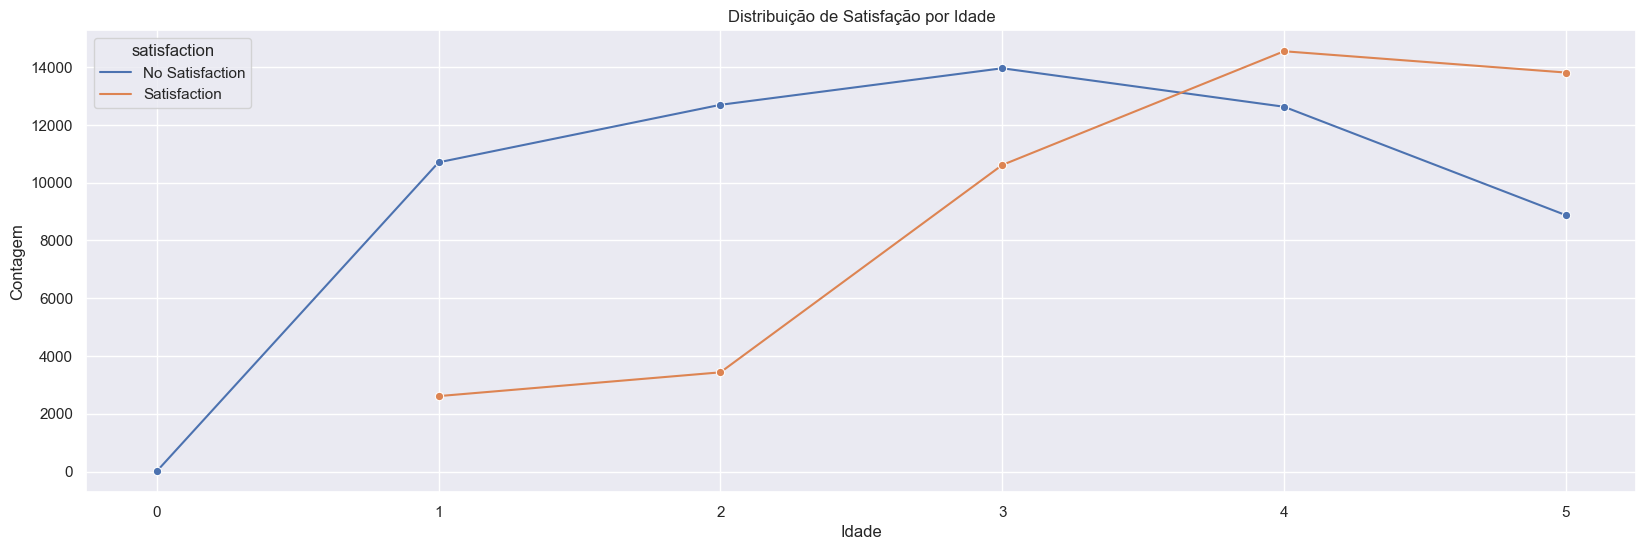

In [91]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='cleanliness', y='count', hue='satisfaction', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

### 1.8.21 Column - carrier_delay_in_minutes

In [92]:
df1['carrier_delay_in_minutes'].sort_values().unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

In [93]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'carrier_delay_in_minutes', 'satisfaction']].groupby(['carrier_delay_in_minutes', 'satisfaction']).count().reset_index()
df_aux.columns = ['carrier_delay_in_minutes', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

carrier_delay_in_minutes     satisfaction  count
0                           0  No Satisfaction  31826
1                           0     Satisfaction  26842
2                           1  No Satisfaction   1608
3                           1     Satisfaction   1340
4                           2  No Satisfaction   1217
5                           2     Satisfaction   1057
6                           3  No Satisfaction   1145
7                           3     Satisfaction    864
8                           4  No Satisfaction   1051
9                           4     Satisfaction    803
10                          5  No Satisfaction    920
11                          5     Satisfaction    772
12                          6  No Satisfaction    864
13                          6     Satisfaction    653
14                          7  No Satisfaction    783
15                          7     Satisfaction    609
16                          8  No Satisfaction    733
17                          8     Satisfaction    562
18                          9  No Satisfaction    709
19                          9     Satisfaction    546
20                         10  No Satisfaction    670
21                         10     Satisfaction    477
22                         11  No Satisfaction    593
23                         11     Satisfaction    468
24                         12  No Satisfaction    578
25                         12     Satisfaction    438
26                         13  No Satisfaction    574
27                         13     Satisfaction    353
28                         14  No Satisfaction    542
29                         14     Satisfaction    393
30                         15  No Satisfaction    512
31                         15     Satisfaction    350
32                         16  No Satisfaction    451
33                         16     Satisfaction    334
34                         17  No Satisfaction    415
35                         17     Satisfaction    291
36                         18  No Satisfaction    414
37                         18     Satisfaction    253
38                         19  No Satisfaction    419
39                         19     Satisfaction    275
40                         20  No Satisfaction    417
41                         20     Satisfaction    228
42                         21  No Satisfaction    372
43                         21     Satisfaction    258
44                         22  No Satisfaction    340
45                         22     Satisfaction    204
46                         23  No Satisfaction    325
47                         23     Satisfaction    204
48                         24  No Satisfaction    325
49                         24     Satisfaction    187
50                         25  No Satisfaction    325
51                         25     Satisfaction    215
52                         26  No Satisfaction    297
53                         26     Satisfaction    166
54                         27  No Satisfaction    319
55                         27     Satisfaction    169
56                         28  No Satisfaction    268
57                         28     Satisfaction    154
58                         29  No Satisfaction    288
59                         29     Satisfaction    158
60                         30  No Satisfaction    288
61                         30     Satisfaction    164
62                         31  No Satisfaction    276
63                         31     Satisfaction    150
64                         32  No Satisfaction    226
65                         32     Satisfaction    130
66                         33  No Satisfaction    213
67                         33     Satisfaction    128
68                         34  No Satisfaction    219
69                         34     Satisfaction    114
70                         35  No Satisfaction    205
71                         35     Satisfaction    125
72                         36  No Satisfaction    178
73       

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


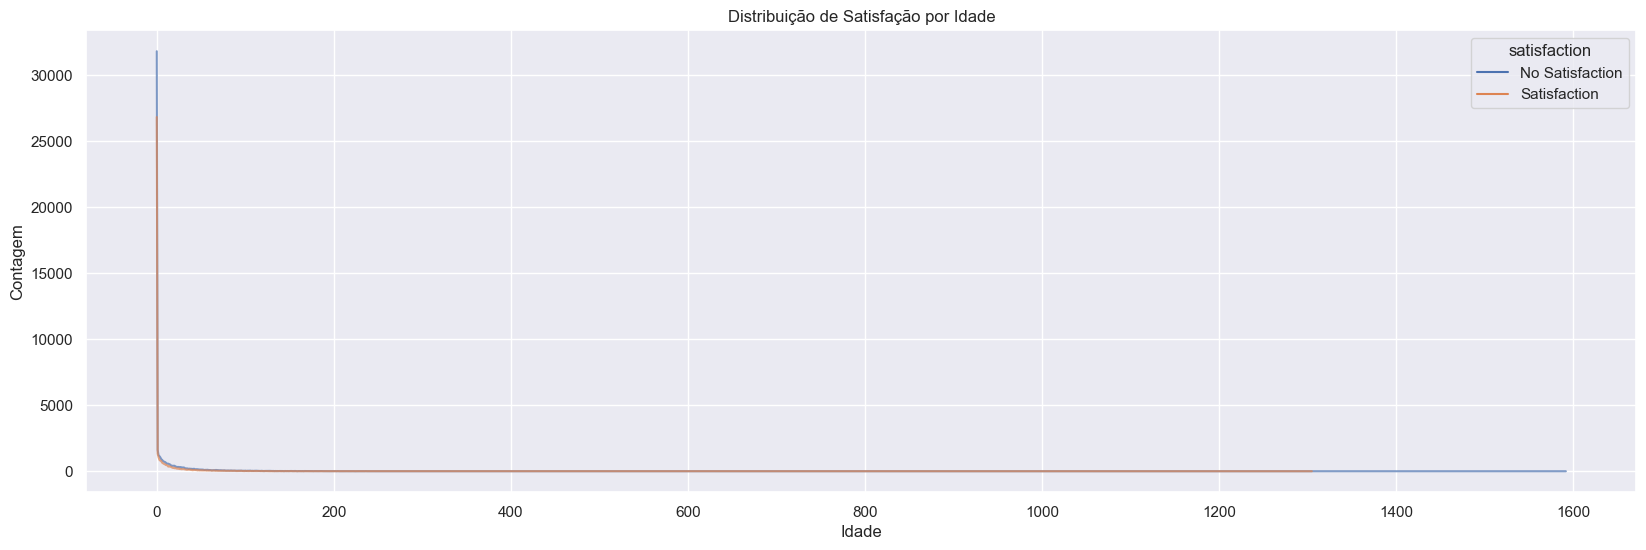

In [94]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
# ax = sns.lineplot(x='carrier_delay_in_minutes', y='count', hue='satisfaction', data=df_aux, marker='o')
ax = sns.lineplot(x='carrier_delay_in_minutes', y='count', hue='satisfaction', data=df_aux, alpha=0.7)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


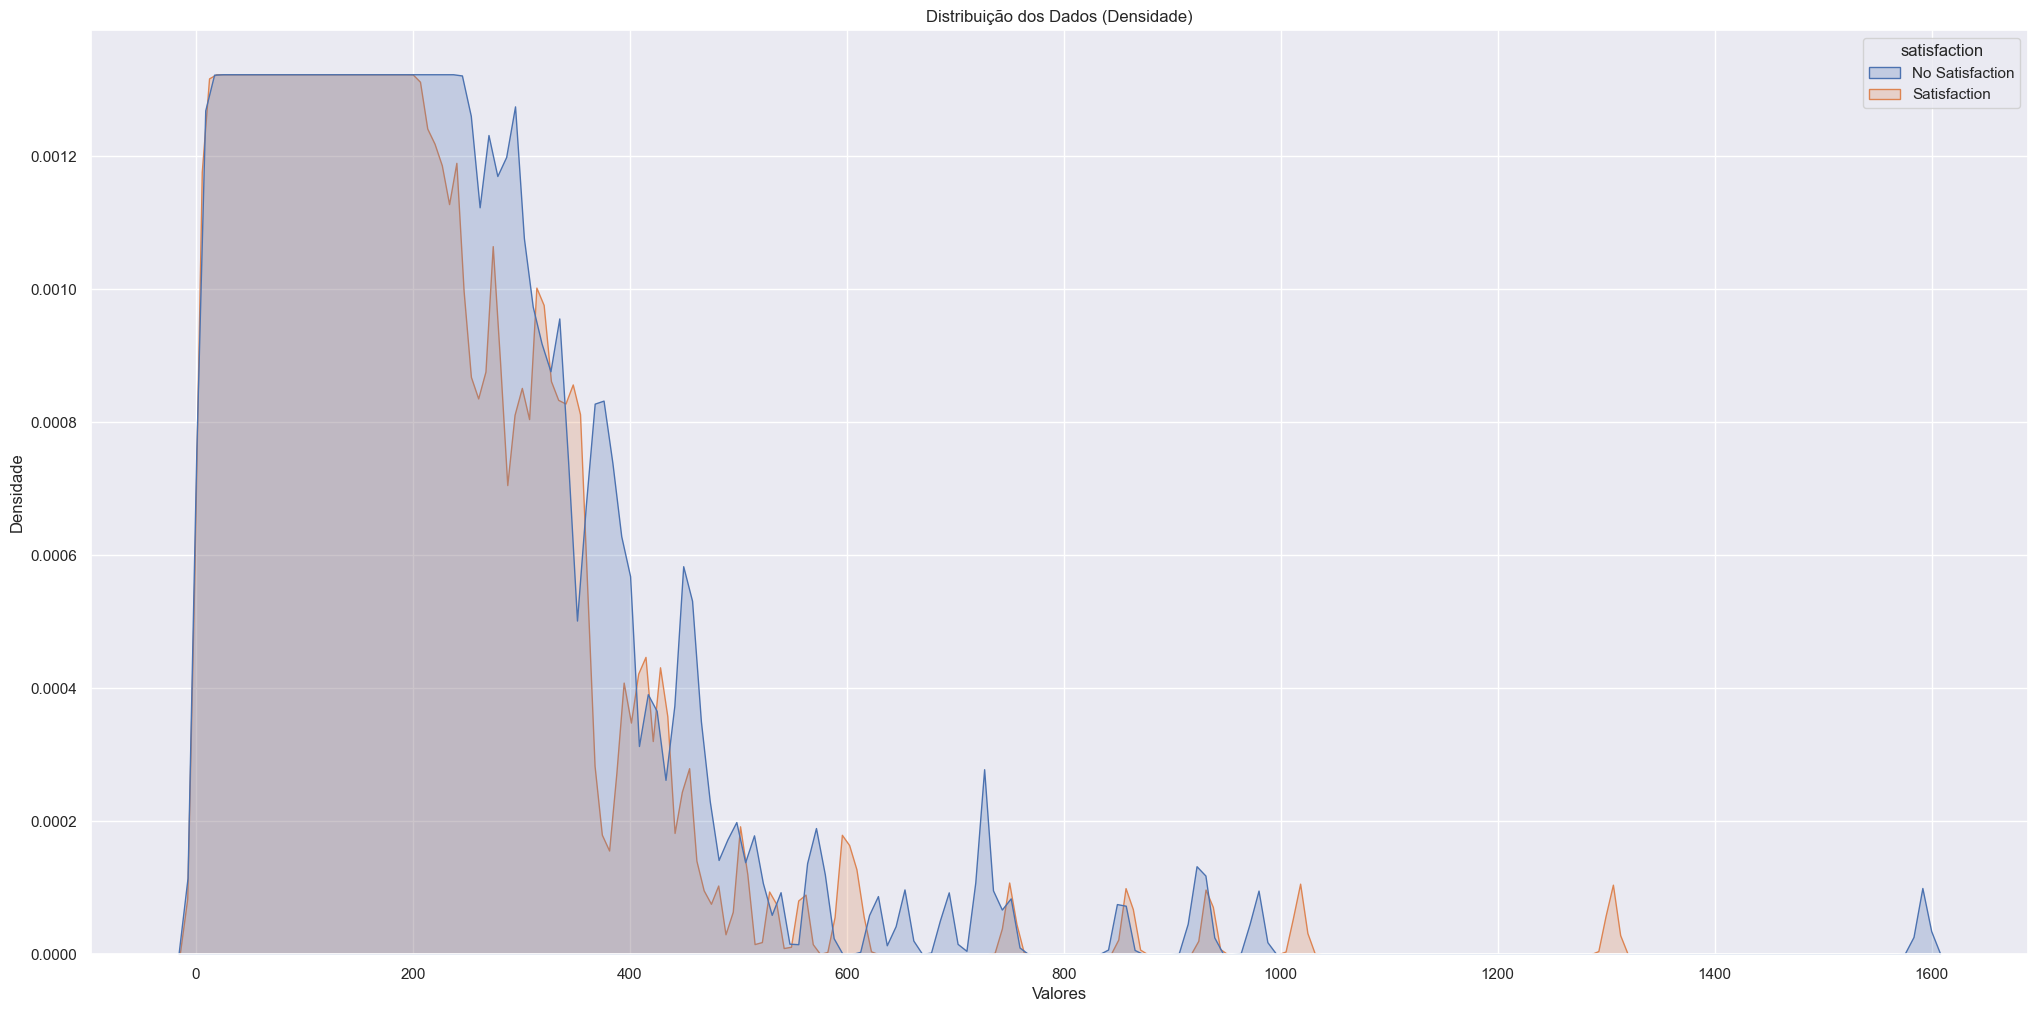

In [95]:
sns.kdeplot(
    data=df_aux,
    x='carrier_delay_in_minutes',
    hue='satisfaction',
    fill=True,
    color='skyblue',
    bw_adjust=.1
    # multiple='stack',
    # common_norm=False
)

plt.title('Distribuição dos Dados (Densidade)')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()

### 1.8.22 Column - delivery_delay_in_minutes

In [96]:
df1['delivery_delay_in_minutes'].sort_values().unique()

array([0.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 5.000e+00,
       6.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 1.000e+01, 1.100e+01,
       1.200e+01, 1.300e+01, 1.400e+01, 1.500e+01, 1.600e+01, 1.700e+01,
       1.800e+01, 1.900e+01, 2.000e+01, 2.100e+01, 2.200e+01, 2.300e+01,
       2.400e+01, 2.500e+01, 2.600e+01, 2.700e+01, 2.800e+01, 2.900e+01,
       3.000e+01, 3.100e+01, 3.200e+01, 3.300e+01, 3.400e+01, 3.500e+01,
       3.600e+01, 3.700e+01, 3.800e+01, 3.900e+01, 4.000e+01, 4.100e+01,
       4.200e+01, 4.300e+01, 4.400e+01, 4.500e+01, 4.600e+01, 4.700e+01,
       4.800e+01, 4.900e+01, 5.000e+01, 5.100e+01, 5.200e+01, 5.300e+01,
       5.400e+01, 5.500e+01, 5.600e+01, 5.700e+01, 5.800e+01, 5.900e+01,
       6.000e+01, 6.100e+01, 6.200e+01, 6.300e+01, 6.400e+01, 6.500e+01,
       6.600e+01, 6.700e+01, 6.800e+01, 6.900e+01, 7.000e+01, 7.100e+01,
       7.200e+01, 7.300e+01, 7.400e+01, 7.500e+01, 7.600e+01, 7.700e+01,
       7.800e+01, 7.900e+01, 8.000e+01, 8.100e+01, 

In [97]:
# satisfaction = 0 = No Satisfaction and 1 = Satisfaction 
df_aux = df1[['id', 'delivery_delay_in_minutes', 'satisfaction']].groupby(['delivery_delay_in_minutes', 'satisfaction']).count().reset_index()
df_aux.columns = ['delivery_delay_in_minutes', 'satisfaction', 'count']

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')

df_aux

delivery_delay_in_minutes     satisfaction  count
0                          0.0  No Satisfaction  30662
1                          0.0     Satisfaction  27497
2                          1.0  No Satisfaction   1160
3                          1.0     Satisfaction   1051
4                          2.0  No Satisfaction   1092
5                          2.0     Satisfaction    972
6                          3.0  No Satisfaction    993
7                          3.0     Satisfaction    959
8                          4.0  No Satisfaction    983
9                          4.0     Satisfaction    924
10                         5.0  No Satisfaction    853
11                         5.0     Satisfaction    805
12                         6.0  No Satisfaction   1049
13                         6.0     Satisfaction    567
14                         7.0  No Satisfaction    959
15                         7.0     Satisfaction    522
16                         8.0  No Satisfaction    911
17                         8.0     Satisfaction    483
18                         9.0  No Satisfaction    821
19                         9.0     Satisfaction    443
20                        10.0  No Satisfaction    756
21                        10.0     Satisfaction    425
22                        11.0  No Satisfaction    728
23                        11.0     Satisfaction    401
24                        12.0  No Satisfaction    688
25                        12.0     Satisfaction    382
26                        13.0  No Satisfaction    692
27                        13.0     Satisfaction    366
28                        14.0  No Satisfaction    578
29                        14.0     Satisfaction    376
30                        15.0  No Satisfaction    533
31                        15.0     Satisfaction    328
32                        16.0  No Satisfaction    542
33                        16.0     Satisfaction    294
34                        17.0  No Satisfaction    538
35                        17.0     Satisfaction    293
36                        18.0  No Satisfaction    476
37                        18.0     Satisfaction    266
38                        19.0  No Satisfaction    461
39                        19.0     Satisfaction    238
40                        20.0  No Satisfaction    413
41                        20.0     Satisfaction    232
42                        21.0  No Satisfaction    426
43                        21.0     Satisfaction    224
44                        22.0  No Satisfaction    366
45                        22.0     Satisfaction    210
46                        23.0  No Satisfaction    374
47                        23.0     Satisfaction    201
48                        24.0  No Satisfaction    381
49                        24.0     Satisfaction    201
50                        25.0  No Satisfaction    325
51                        25.0     Satisfaction    180
52                        26.0  No Satisfaction    314
53                        26.0     Satisfaction    210
54                        27.0  No Satisfaction    341
55                        27.0     Satisfaction    167
56                        28.0  No Satisfaction    283
57                        28.0     Satisfaction    156
58                        29.0  No Satisfaction    268
59                        29.0     Satisfaction    148
60                        30.0  No Satisfaction    300
61                        30.0     Satisfaction    145
62                        31.0  No Satisfaction    228
63                        31.0     Satisfaction    129
64                        32.0  No Satisfaction    235
65                        32.0     Satisfaction    116
66                        33.0  No Satisfaction    241
67                        33.0     Satisfaction    125
68                        34.0  No Satisfaction    235
69                        34.0     Satisfaction    121
70                        35.0  No Satisfaction    210
71                        35.0     Satisfacti

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


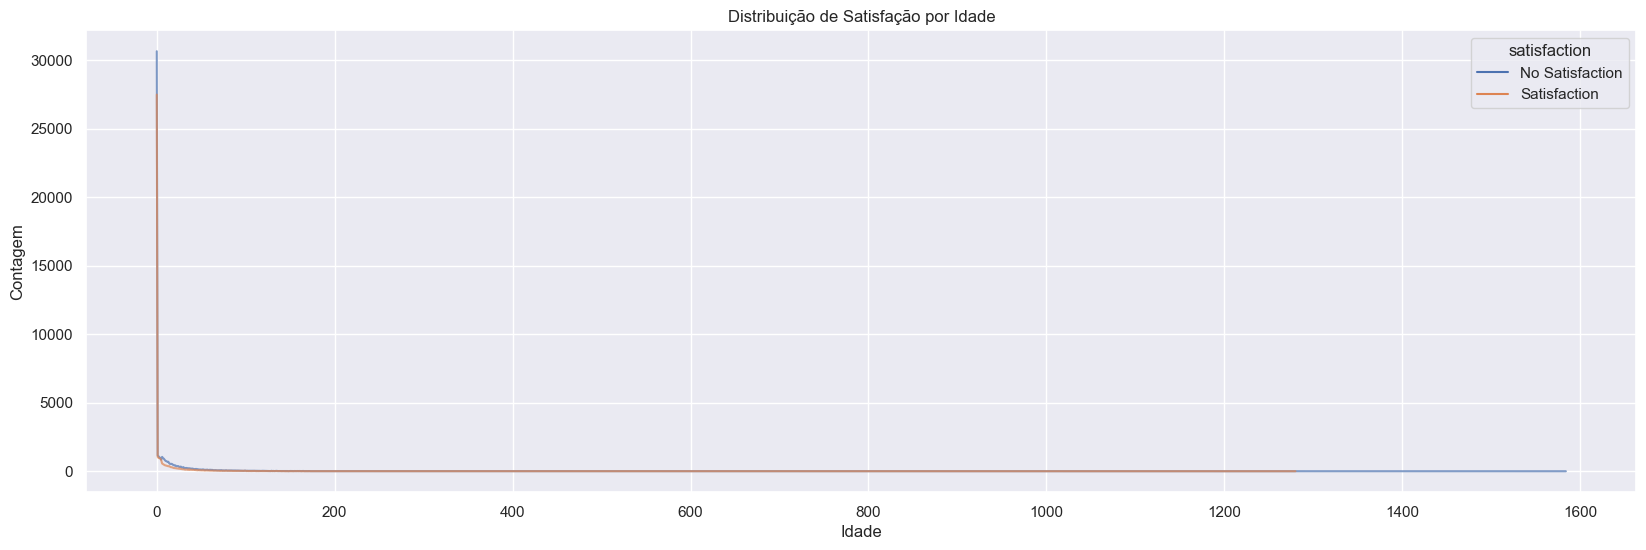

In [98]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
# ax = sns.lineplot(x='delivery_delay_in_minutes', y='count', hue='satisfaction', data=df_aux, marker='o')
ax = sns.lineplot(x='delivery_delay_in_minutes', y='count', hue='satisfaction', data=df_aux, alpha=0.7)

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


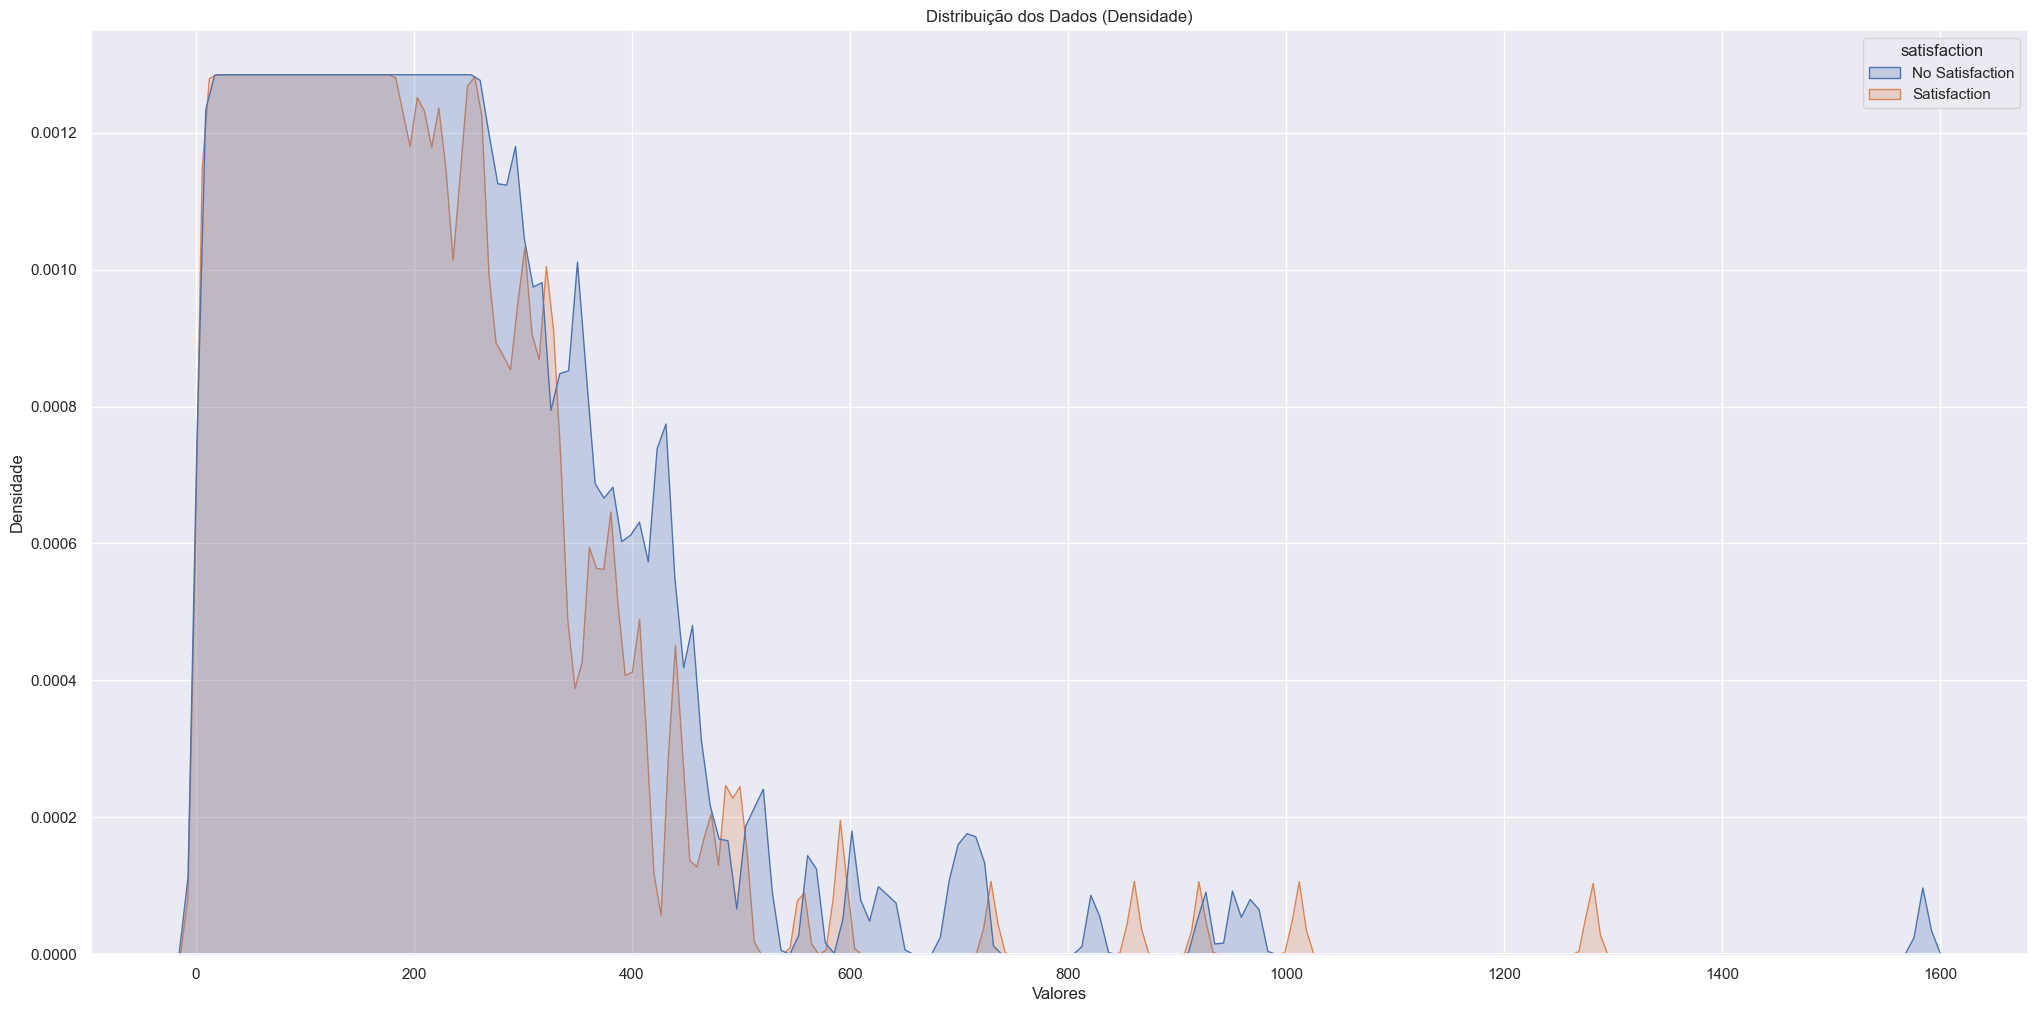

In [99]:
sns.kdeplot(
    data=df_aux,
    x='delivery_delay_in_minutes',
    hue='satisfaction',
    fill=True,
    color='skyblue',
    bw_adjust=.1
    # multiple='stack',
    # common_norm=False
)

plt.title('Distribuição dos Dados (Densidade)')
plt.xlabel('Valores')
plt.ylabel('Densidade')
plt.show()

### 1.8.23 Columns numerics hist

In [100]:
df1.dtypes

id                              int64
gender                          int64
customer_type                   int64
age                             int64
type_of_purchase                int64
store_size                      int64
store_distance                  int64
instore_wifi                    int64
open/close_time_convenient      int64
easy_of_online_shopping         int64
store_location                  int64
toilet_cleaning                 int64
dressing_room                   int64
waiting_room                    int64
kids_entertainment              int64
seller_service                  int64
showroom                        int64
self-store                      int64
purchase_service                int64
store_service                   int64
cleanliness                     int64
carrier_delay_in_minutes        int64
delivery_delay_in_minutes     float64
satisfaction                    int64
dtype: object

In [101]:
df1_numerics = df1.select_dtypes( exclude='object' )

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'customer_type'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'type_of_purchase'}>],
       [<Axes: title={'center': 'store_size'}>,
        <Axes: title={'center': 'store_distance'}>,
        <Axes: title={'center': 'instore_wifi'}>,
        <Axes: title={'center': 'open/close_time_convenient'}>,
        <Axes: title={'center': 'easy_of_online_shopping'}>],
       [<Axes: title={'center': 'store_location'}>,
        <Axes: title={'center': 'toilet_cleaning'}>,
        <Axes: title={'center': 'dressing_room'}>,
        <Axes: title={'center': 'waiting_room'}>,
        <Axes: title={'center': 'kids_entertainment'}>],
       [<Axes: title={'center': 'seller_service'}>,
        <Axes: title={'center': 'showroom'}>,
        <Axes: title={'center': 'self-store'}>,
        <Axes: title={'center': 'purchase_service'}>,
        <Axes: title={'center'

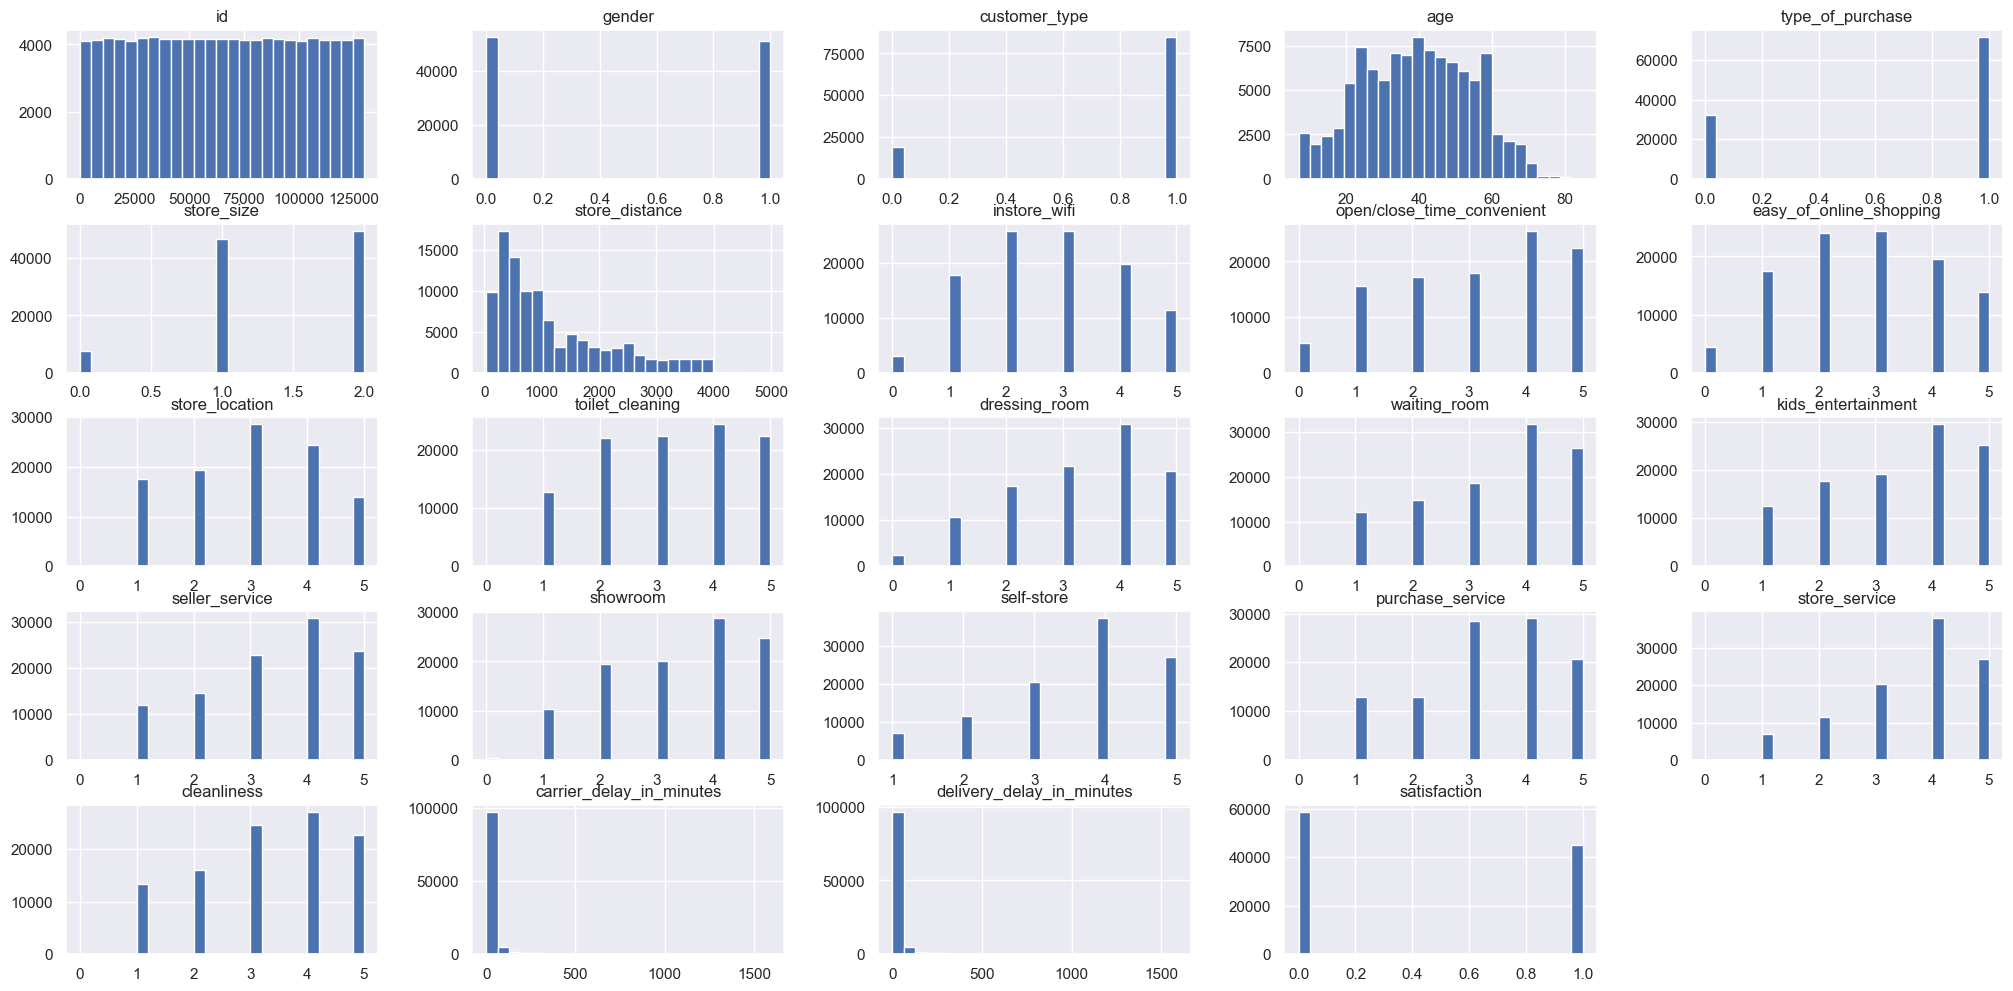

In [102]:
df1_numerics.hist(bins=25)

## 1.9 Bivariate analysis

### 1.9.1 Columns Gender

In [118]:
df1.dtypes

id                              int64
gender                          int64
customer_type                   int64
age                             int64
type_of_purchase                int64
store_size                      int64
store_distance                  int64
instore_wifi                    int64
open/close_time_convenient      int64
easy_of_online_shopping         int64
store_location                  int64
toilet_cleaning                 int64
dressing_room                   int64
waiting_room                    int64
kids_entertainment              int64
seller_service                  int64
showroom                        int64
self-store                      int64
purchase_service                int64
store_service                   int64
cleanliness                     int64
carrier_delay_in_minutes        int64
delivery_delay_in_minutes     float64
satisfaction                    int64
dtype: object

In [129]:
# df1[['gender', 'seller_service', 'store_size', 'satisfaction']].sample(10)

In [155]:
df_aux                      =   df1[['id', 'gender', 'seller_service', 'satisfaction']].groupby(['gender', 'seller_service', 'satisfaction']).count().reset_index()

df_aux['satisfaction']      =   df_aux['satisfaction'].apply(lambda x: 'No Satisfaction' if x == 0 else 'Satisfaction')
df_aux['gender']            =   df_aux['gender'].apply(lambda x: 'Female' if x == 0 else 'Male')

df_aux.columns              = ['gender', 'seller_service', 'satisfaction', 'count']

df_aux['combined_hue']      =   df_aux['seller_service'].astype(str) + '_' + df_aux['satisfaction'].astype(str)


In [156]:
df_aux.sample(1)

gender  seller_service     satisfaction  count       combined_hue
3  Female               2  No Satisfaction   5966  2_No Satisfaction

c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\xampp\htdocs\Meu\DS\HackDay\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


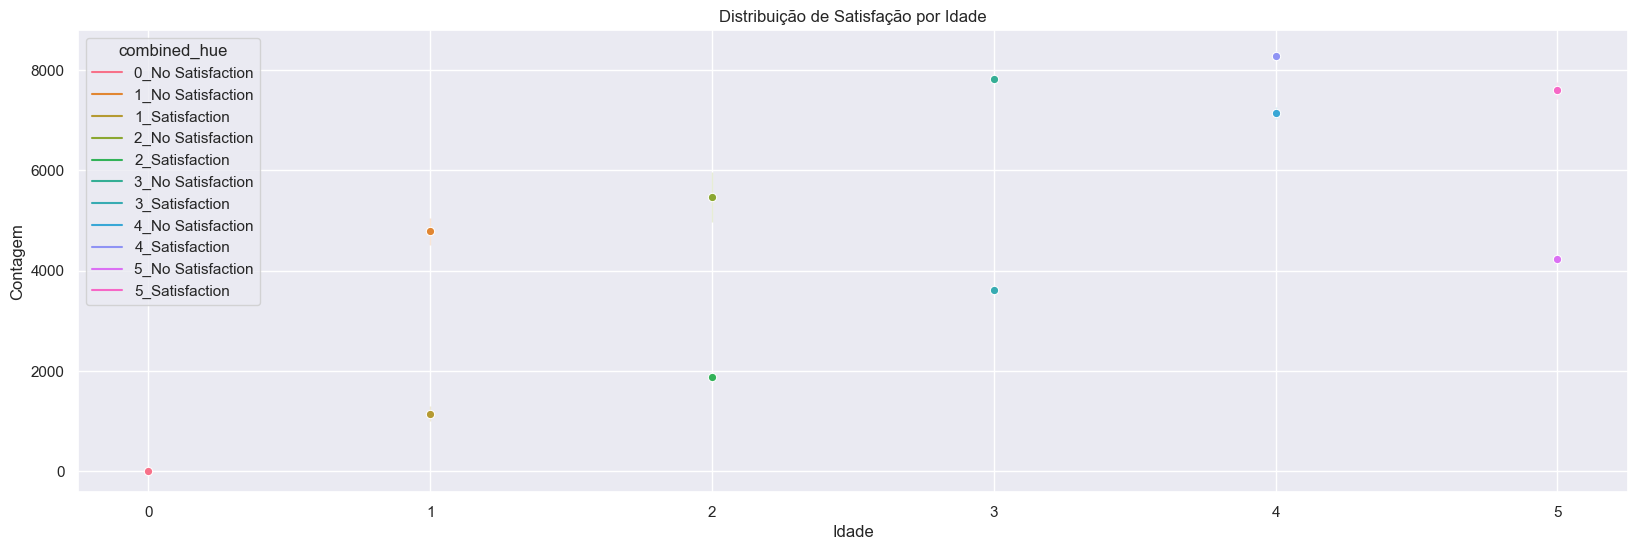

In [158]:
# Criar gráfico de barras empilhadas
plt.figure(figsize=(20, 6))
ax = sns.lineplot(x='seller_service', y='count', hue='combined_hue', data=df_aux, marker='o')

# Adicionar rótulos e título
plt.title('Distribuição de Satisfação por Idade')
plt.xlabel('Idade')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

# Mostrar o gráfico
plt.show()

# 2.0 Feature Engineering

In [103]:
df2 = df1.copy()

## 2.1 New colum store_location_

In [104]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.2 New colum customer_type_

In [105]:
df2['customer_type_'] = (df2['store_distance'] * 0.8) + (df2['age'] * .2)

In [106]:
# df2['age'].min()

## 2.8 Verificaty satisfaction correlation

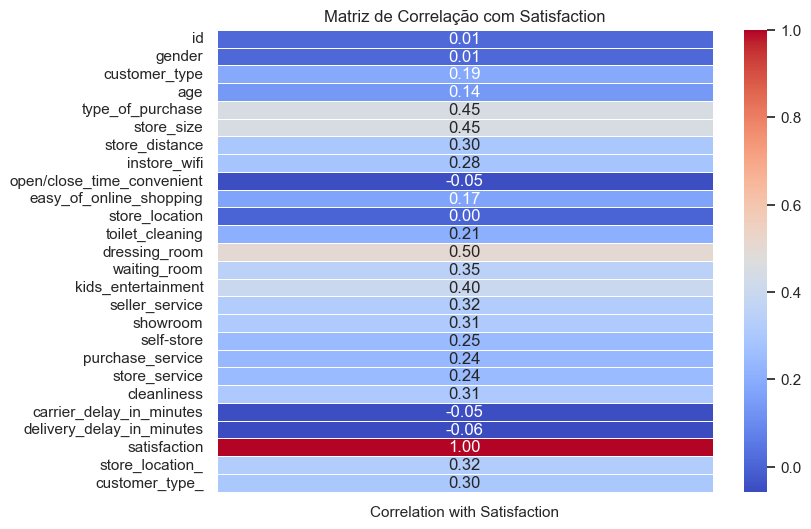

In [107]:
# Assuming that 'satisfaction' is the column of interest in your DataFrame df2.
correlation_matrix = df2.corrwith(df2['satisfaction'])

# Create a heatmap using Seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(correlation_matrix, columns=['Correlation with Satisfaction']), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação com Satisfaction')
plt.show()

# 'type_of_purchase', 'store_size', 'store_distance', 'dressing_room', 'waiting_room', 'kids_entertainment', 'seller_service', 'showroom', 'cleanliness', 'store_location_', 'customer_type_'

## 2.3 New colum store_location_

In [108]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.4 New colum store_location_

In [109]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.5 New colum store_location_

In [110]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.6 New colum store_location_

In [111]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

## 2.7 New colum store_location_

In [112]:
df2['store_location_'] = (df2['instore_wifi'] * 0.75) + (df2['easy_of_online_shopping'] * 0.25) - (df2['open/close_time_convenient'] * 0.4)

# 3.0 Data Filtering

# 4.0 EDA

# 5.0 Data preparation

In [113]:
df5 = df2.copy()

In [114]:
X = df5.drop( 'satisfaction', axis=1 )
y = df5['satisfaction'].copy()

x_train, x_validation, y_train, y_validation = ms.train_test_split( X, y, test_size=0.20 )

df5 = pd.concat( [x_train, y_train], axis=1 )

# 6.0. Feature Selection

# 7.0 Machine Learning

In [115]:
df7 = df5.copy()

In [116]:
cols_selected = ['type_of_purchase', 'store_size', 'store_distance', 'dressing_room', 'waiting_room', 'kids_entertainment', 'seller_service', 'showroom', 'cleanliness', 'store_location_', 'customer_type_']

x_train = df5[ cols_selected ]
x_val = x_validation[ cols_selected ]
y_val = y_validation.copy()